# Retention Project Workbook (Full Data Science Pipeline)

**Target:** retained

**Goals:**
- Discover Drivers of retention through EDA and clustering.
- Use features to run classification models and make predictions

**Deliverables:**
- Work Notebook (Github)
- Report Notebook (Github)
- Wrangle.py (Github)
- README.md (Github)
- Project Summary for README, Report, Portfolio/Resume

**Initial thoughts and hypothesis:**
- Group features into categories
    - Target
        - retained
    - Student Demographics
        - id
        - race_ethn
        - sex
        - fgen
        - age_at_start_term
        - depend_status  
    - Financials
        - pell_ever
        - efc
        - fa_recd
    - Educational Stats
        - enrolled_1_back
        - time_status
        - sutdent_class
        - hs_gpa
        - term_gpa
        - original_type
        - cip_2dig
        - act
        - astd
        - dubya_count_term
        - span
        - days_between
- Educational Stats will probably have the most impact
- age, fgen, depend_status and financial aid will probably also be drivers
- retention is fall to fall and spring to spring

In [1]:
# Import for Data Manipulation
import pandas as pd
import numpy as np 

# Import for Data Visualization
import seaborn as sns
from matplotlib import pyplot as plt
import squarify

# Import for data acquisition and prep
import wrangle

# Import for Scaling and Spliting the data
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer

# Import for hypothesis testing
from scipy import stats

# Import for Classification models
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

# Import for analysis of classification models
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Import for Clustering
from sklearn.cluster import KMeans

# Import to ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Set to see all rows and columns
pd.options.display.max_columns = None
pd.options.display.max_rows = None
pd.options.display.max_colwidth = None

# Acquire

In [2]:
# students = pd.read_excel('college_retention_data.xlsx')

In [3]:
# def acquire_student_data():
#     '''
#     This function reads in a excel file and returns it as a dataframe.
#     '''
#     # Read excel into df
#     df = pd.read_excel('college_retention_data.xlsx')
#     # Return df
#     return df

In [4]:
# Read in Data dictionary
# data_dict = pd.read_excel('college_retention_data.xlsx',sheet_name=1)

In [5]:
# def acquire_data_dict():
#     '''
#     This funciton acquires the included data dictionary.
#     '''
#     # Read dictionary into dataframe
#     df = pd.read_excel('college_retention_data.xlsx',sheet_name=1)
#     # Return the dataframe
#     return df

# Prep

## Student Data Prep

In [6]:
# # Create function to manipulate cip df for ease of use
# def get_cip_codes():
#     # read in df
#     cip = pd.read_csv('cip_codes.csv')
#     # Narrow down df
#     cip = cip[['Title','CIP Code']]
#     # Fix columns
#     cip.columns = [col.lower().replace(' ','_') for col in cip]
#     # fix cip values
#     cip['cip_code'] = cip.cip_code.apply(lambda x: x[2:4])
#     # make int
#     cip['cip_code'] = cip.cip_code.astype('int')
#     # Rename cip column
#     cip = cip.rename(columns={'cip_code':'cip'})
#     # fix title vlaues
#     cip['title'] = cip.title.apply(lambda x: x.lower().replace(' ' , '_').replace( '.' , ''))
#     # return df
#     return cip

In [7]:
# # Test Function from wrangle.py
# students = wrangle.acquire_student_data()

In [8]:
# # Lowercase all column names
# students.columns = [col.lower() for col in students]

In [9]:
# # Change column names for ease of use
# students = students.rename(columns={'fakeid':'id','enrolled_1_back':'enrolled_between','student_classif':'student_year',\
#                                     'originaltype':'enroll_type','cip_2dig':'cip','astd':'academic_standing',\
#                                     'dubya_count_term':'w_count','span':'yrs_since_start','days_between':'reg_before_start'})

In [10]:
# # Drop Nulls for initial pass
# students = students.dropna()

In [11]:
# # Drop UN cip value
# students = students[students['cip'] != 'UN']
# # Retrieve cip codes with descriptions and return dataframe
# cip = get_cip_codes()

In [12]:
# students = pd.merge(students,cip, on='cip', how='left')

In [13]:
# students.w_count.value_counts()

In [14]:
# # One hot encode categorical columns
# # Replace (1,0): retained, enrolled_between, sex, time_status, pell_ever, academic_standing, fa_recd, w_count
# students['retained'] = students.retained.str.replace('Y', '1').str.replace('N', '0')
# students['enrolled_between'] = students.enrolled_between.str.replace('Y', '1').str.replace('N', '0')
# students['sex'] = students.sex.str.replace('F', '1').str.replace('M', '0')
# students['time_status'] = students.time_status.str.replace('FULL', '1').str.replace('PART', '0')
# students['pell_ever'] = students.pell_ever.str.replace('Y', '1').str.replace('N', '0')
# students['academic_standing'] = students.academic_standing.str.replace('GOODBIN', '1').str.replace('ISSUEBIN', '0')
# students['fa_recd'] = students.fa_recd.str.replace('Y', '1').str.replace('N', '0')
# students['w_count'] = students.w_count.str.replace('ONE_OR_MORE', '1').str.replace('NONE', '0')
# # Reassign as int type
# students[['retained','enrolled_between','sex','time_status','pell_ever','academic_standing','fa_recd','w_count']] = \
# students[['retained','enrolled_between','sex','time_status','pell_ever','academic_standing','fa_recd','w_count']].astype('int')
# # Create dummies: race_ethn, fgen, student_year, enroll_type, cip, age_at_start_term, act, depend_status, yrs_since_start
# dummy_name = pd.get_dummies(students[['race_ethn','fgen','student_year','enroll_type','title','age_at_start_term','act','depend_status','yrs_since_start']],dummy_na=False)
# # Combine df's
# students = pd.concat([students,dummy_name],axis=1)

In [15]:
# students.head()

In [16]:
# # Create prep function
# def prep_student_data(df):
#     '''
#     This function takes in the acquired dataframe and prepare the data for exploration.
#     '''
#     # Lowercase all column names
#     df.columns = [col.lower() for col in df]
#     # Change column names for ease of use
#     df = df.rename(columns={'fakeid':'id','enrolled_1_back':'enrolled_between','student_classif':'student_year',\
#                                     'originaltype':'enroll_type','cip_2dig':'cip','astd':'academic_standing',\
#                                     'dubya_count_term':'w_count','span':'yrs_since_start','days_between':'reg_before_start'})
#     # Drop Nulls for initial pass
#     df = df.dropna()
    
#     # Drop UN cip value
#     df = df[df['cip'] != 'UN']
#     # Retrieve cip codes with descriptions and return dataframe
#     cip = get_cip_codes()
#     # Merge the df's
#     students = pd.merge(students,cip, on='cip', how='left')

#     # fix age at start term variables (23 - 29, to 23-29)
#     df['age_at_start_term'] = df.age_at_start_term.str.replace(' ','')
    
#     # One hot encode categorical columns
#     # Replace (1,0): retained, enrolled_between, sex, time_status, pell_ever, academic_standing, fa_recd, w_count
#     df['retained'] = df.retained.str.replace('Y', '1').str.replace('N', '0')
#     df['enrolled_between'] = df.enrolled_between.str.replace('Y', '1').str.replace('N', '0')
#     df['sex'] = df.sex.str.replace('F', '1').str.replace('M', '0')
#     df['time_status'] = df.time_status.str.replace('FULL', '1').str.replace('PART', '0')
#     df['pell_ever'] = df.pell_ever.str.replace('Y', '1').str.replace('N', '0')
#     df['academic_standing'] = df.academic_standing.str.replace('GOODBIN', '1').str.replace('ISSUEBIN', '0')
#     df['fa_recd'] = df.fa_recd.str.replace('Y', '1').str.replace('N', '0')
#     df['w_count'] = df.w_count.str.replace('ONE_OR_MORE', '1').str.replace('NONE', '0')

#     # Reassign as int type
#     df[['retained','enrolled_between','sex','time_status','pell_ever','academic_standing','fa_recd','w_count']] = \
#     df[['retained','enrolled_between','sex','time_status','pell_ever','academic_standing','fa_recd','w_count']].astype('int')
     
#     # Create dummies: race_ethn, fgen, student_year, enroll_type, cip, age_at_start_term, act, depend_status, yrs_since_start
#     dummy_name = pd.get_dummies(df[['race_ethn','fgen','student_year','enroll_type','title','age_at_start_term','act','depend_status','yrs_since_start']],dummy_na=False)

#     # Combine df's
#     df = pd.concat([df,dummy_name],axis=1)
    
#     # Return cleaned df
#     return df

## Addressing unique students ID

In [17]:
# students['id'].nunique()

In [18]:
# len(students)

In [19]:
# [students['id'].value_counts() == 1]

In [20]:
# students.head()

In [21]:
# student_zero[['enrolled_between','time_status','student_year','efc','term_gpa','cip','age_at_start_term','depend_status','w_count','yrs_since_start','reg_before_start']]\
# .sort_values(by=['student_year','yrs_since_start','age_at_start_term',])

In [22]:
# student_zero = train[train['id'] == 459725]
# student_zero

In [23]:
# freshman = students[students['student_year'] =='FR']

In [24]:
# freshman['id'].nunique()

In [25]:
# freshman_zero

In [26]:
# freshman['id'].value_counts()

In [27]:
# freshman_zero = freshman[freshman['id'] == 508071]

In [28]:
# freshman_zero[['retained','enrolled_between','time_status','student_year','efc','term_gpa','cip','age_at_start_term','depend_status','w_count','yrs_since_start','reg_before_start']]\
# .sort_values(by=['student_year','yrs_since_start','age_at_start_term',])

In [29]:
# students.id.value_counts().mean()

### Summary of ID assessment
- Each individual row is considered an individual observation of retention year over a year based on variables provided. Individual students show up in dataset multiple times. So this is not a measure of whether an individual student is retained over time but a measure of individual instances of year over year retention. With more data provided and further exploration and analysis, more could be done to understand drivers of individual student retention.

## Impute (Round 2)

In [30]:
# efc


In [31]:
# hs_gpa

## Split

In [32]:
# Test Functions
students = wrangle.prep_student_data(wrangle.acquire_student_data())
students.shape

(140800, 83)

In [33]:
# Split Data for further exploration
target = 'retained'
train, validate, test = wrangle.split_data(students, target)
train.shape

(78848, 83)

In [34]:
# # Split for modeling
# target = 'retained'
# X_train, y_train = wrangle.model_split(train,target)
# X_validate, y_validate = wrangle.model_split(validate,target)
# X_test, y_test = wrangle.model_split(test,target)
# X_train.shape

### Scaling

In [35]:
# Scale data
train_scaled, validate_scaled, test_scaled = wrangle.scale_data(train,validate,test)
train_scaled.shape

(78848, 12)

# Initial EDA

## Univariate (students df used)

In [ ]:
students.shape

(140800, 83)

- (448176, 22)

In [ ]:
students.describe(include='all')

,retained,enrolled_between,race_ethn,sex,time_status,fgen,student_year,pell_ever,efc,hs_gpa,term_gpa,enroll_type,cip,age_at_start_term,act,academic_standing,fa_recd,depend_status,w_count,yrs_since_start,reg_before_start,title,race_ethn_African American,race_ethn_American Indian/Alaskan Native,race_ethn_Asian,race_ethn_Hispanic,race_ethn_International,race_ethn_Missing/Unknown,race_ethn_Native Hawaiian/Pacific Islander,race_ethn_Two or More Races,race_ethn_Two or more races,race_ethn_White,fgen_1GN,fgen_1GY,student_year_FR,student_year_JU,student_year_SE,student_year_SO,enroll_type_CONC,enroll_type_FIRST,enroll_type_TRANSFER,"title_area,_ethnic,_cultural,_gender,_and_group_studies",title_biological_and_biomedical_sciences,"title_business,_management,_marketing,_and_related_support_services","title_communication,_journalism,_and_related_programs",title_communications_technologies/technicians_and_support_services,title_computer_and_information_sciences_and_support_services,title_education,title_engineering,title_engineering/engineering-related_technologies/technicians,title_english_language_and_literature/letters,"title_foreign_languages,_literatures,_and_linguistics",title_health_professions_and_related_programs,title_history,"title_homeland_security,_law_enforcement,_firefighting_and_related_protective_services","title_liberal_arts_and_sciences,_general_studies_and_humanities",title_mathematics_and_statistics,title_multi/interdisciplinary_studies,title_natural_resources_and_conservation,"title_parks,_recreation,_leisure,_fitness,_and_kinesiology",title_philosophy_and_religious_studies,title_physical_sciences,title_psychology,title_public_administration_and_social_service_professions,title_social_sciences,title_transportation_and_materials_moving,title_visual_and_performing_arts,age_at_start_term_18-younger,age_at_start_term_19-22,age_at_start_term_23-29,age_at_start_term_30-older,act_20 or more,act_NADA,act_Under 20,depend_status_DEP,depend_status_IND,yrs_since_start_0,yrs_since_start_1,yrs_since_start_2,yrs_since_start_3,yrs_since_start_4,yrs_since_start_5,yrs_since_start_6 or more
count,140800.000000,140800.000000,140800,140800.000000,140800.000000,140800,140800,140800.000000,140800.000000,140800.000000,140800.000000,140800,140800.0,140800,140800,140800.000000,140800.000000,140800,140800.000000,140800.0,140800.000000,140800,140800.000000,140800.000000,140800.000000,140800.000000,140800.000000,140800.000000,140800.000000,140800.000000,140800.000000,140800.000000,140800.000000,140800.000000,140800.000000,140800.000000,140800.000000,140800.000000,140800.000000,140800.000000,140800.000000,140800.000000,140800.000000,140800.000000,140800.000000,140800.000000,140800.000000,140800.000000,140800.000000,140800.000000,140800.000000,140800.000000,140800.000000,140800.000000,140800.000000,140800.000000,140800.000000,140800.000000,140800.000000,140800.000000,140800.000000,140800.000000,140800.000000,140800.000000,140800.000000,140800.000000,140800.000000,140800.000000,140800.000000,140800.000000,140800.00000,140800.000000,140800.000000,140800.000000,140800.000000,140800.000000,140800.000000,140800.000000,140800.000000,140800.000000,140800.000000,140800.000000,140800.000000
unique,NaN,NaN,10,NaN,NaN,3,4,NaN,NaN,NaN,NaN,3,26.0,4,3,NaN,NaN,3,NaN,7.0,NaN,26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,White,NaN,NaN,1GY,FR,NaN,NaN,NaN,NaN,FIRST,52.0,19-22,20 or more,NaN,NaN,DEP,NaN,0.0,NaN,"business,_management,_marketing,_and_related_support_services",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,69912,NaN,NaN,88468,56911,NaN,Na

- efc, hs_gpa, and term_gpa have missing data. efc has a suspicious max. 
- 1 key variable (id), 17 categorical, 4 continuous (efc,hs_gpa,term_gpa,reg_before_start)

In [ ]:
students.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 140800 entries, 0 to 140799
Data columns (total 83 columns):
 #   Column                                                                                  Non-Null Count   Dtype  
---  ------                                                                                  --------------   -----  
 0   retained                                                                                140800 non-null  int64  
 1   enrolled_between                                                                        140800 non-null  int64  
 2   race_ethn                                                                               140800 non-null  object 
 3   sex                                                                                     140800 non-null  int64  
 4   time_status                                                                             140800 non-null  int64  
 5   fgen                                                      

In [ ]:
students.isnull().sum()

retained                                                                                  0
enrolled_between                                                                          0
race_ethn                                                                                 0
sex                                                                                       0
time_status                                                                               0
fgen                                                                                      0
student_year                                                                              0
pell_ever                                                                                 0
efc                                                                                       0
hs_gpa                                                                                    0
term_gpa                                                                        

Missing
- efc: 128245
- hs_gpa: 247365
- term_gpa: 89

In [ ]:
students.isnull().mean()

retained                                                                                  0.0
enrolled_between                                                                          0.0
race_ethn                                                                                 0.0
sex                                                                                       0.0
time_status                                                                               0.0
fgen                                                                                      0.0
student_year                                                                              0.0
pell_ever                                                                                 0.0
efc                                                                                       0.0
hs_gpa                                                                                    0.0
term_gpa                                                    

Percent Missing
- efc: 0.286149 (Impute efc)
- hs_gpa: 0.551937 (Potentially drop hs_gpa)
- term_gpa: 0.000199 (Do not worry about term_gpa)

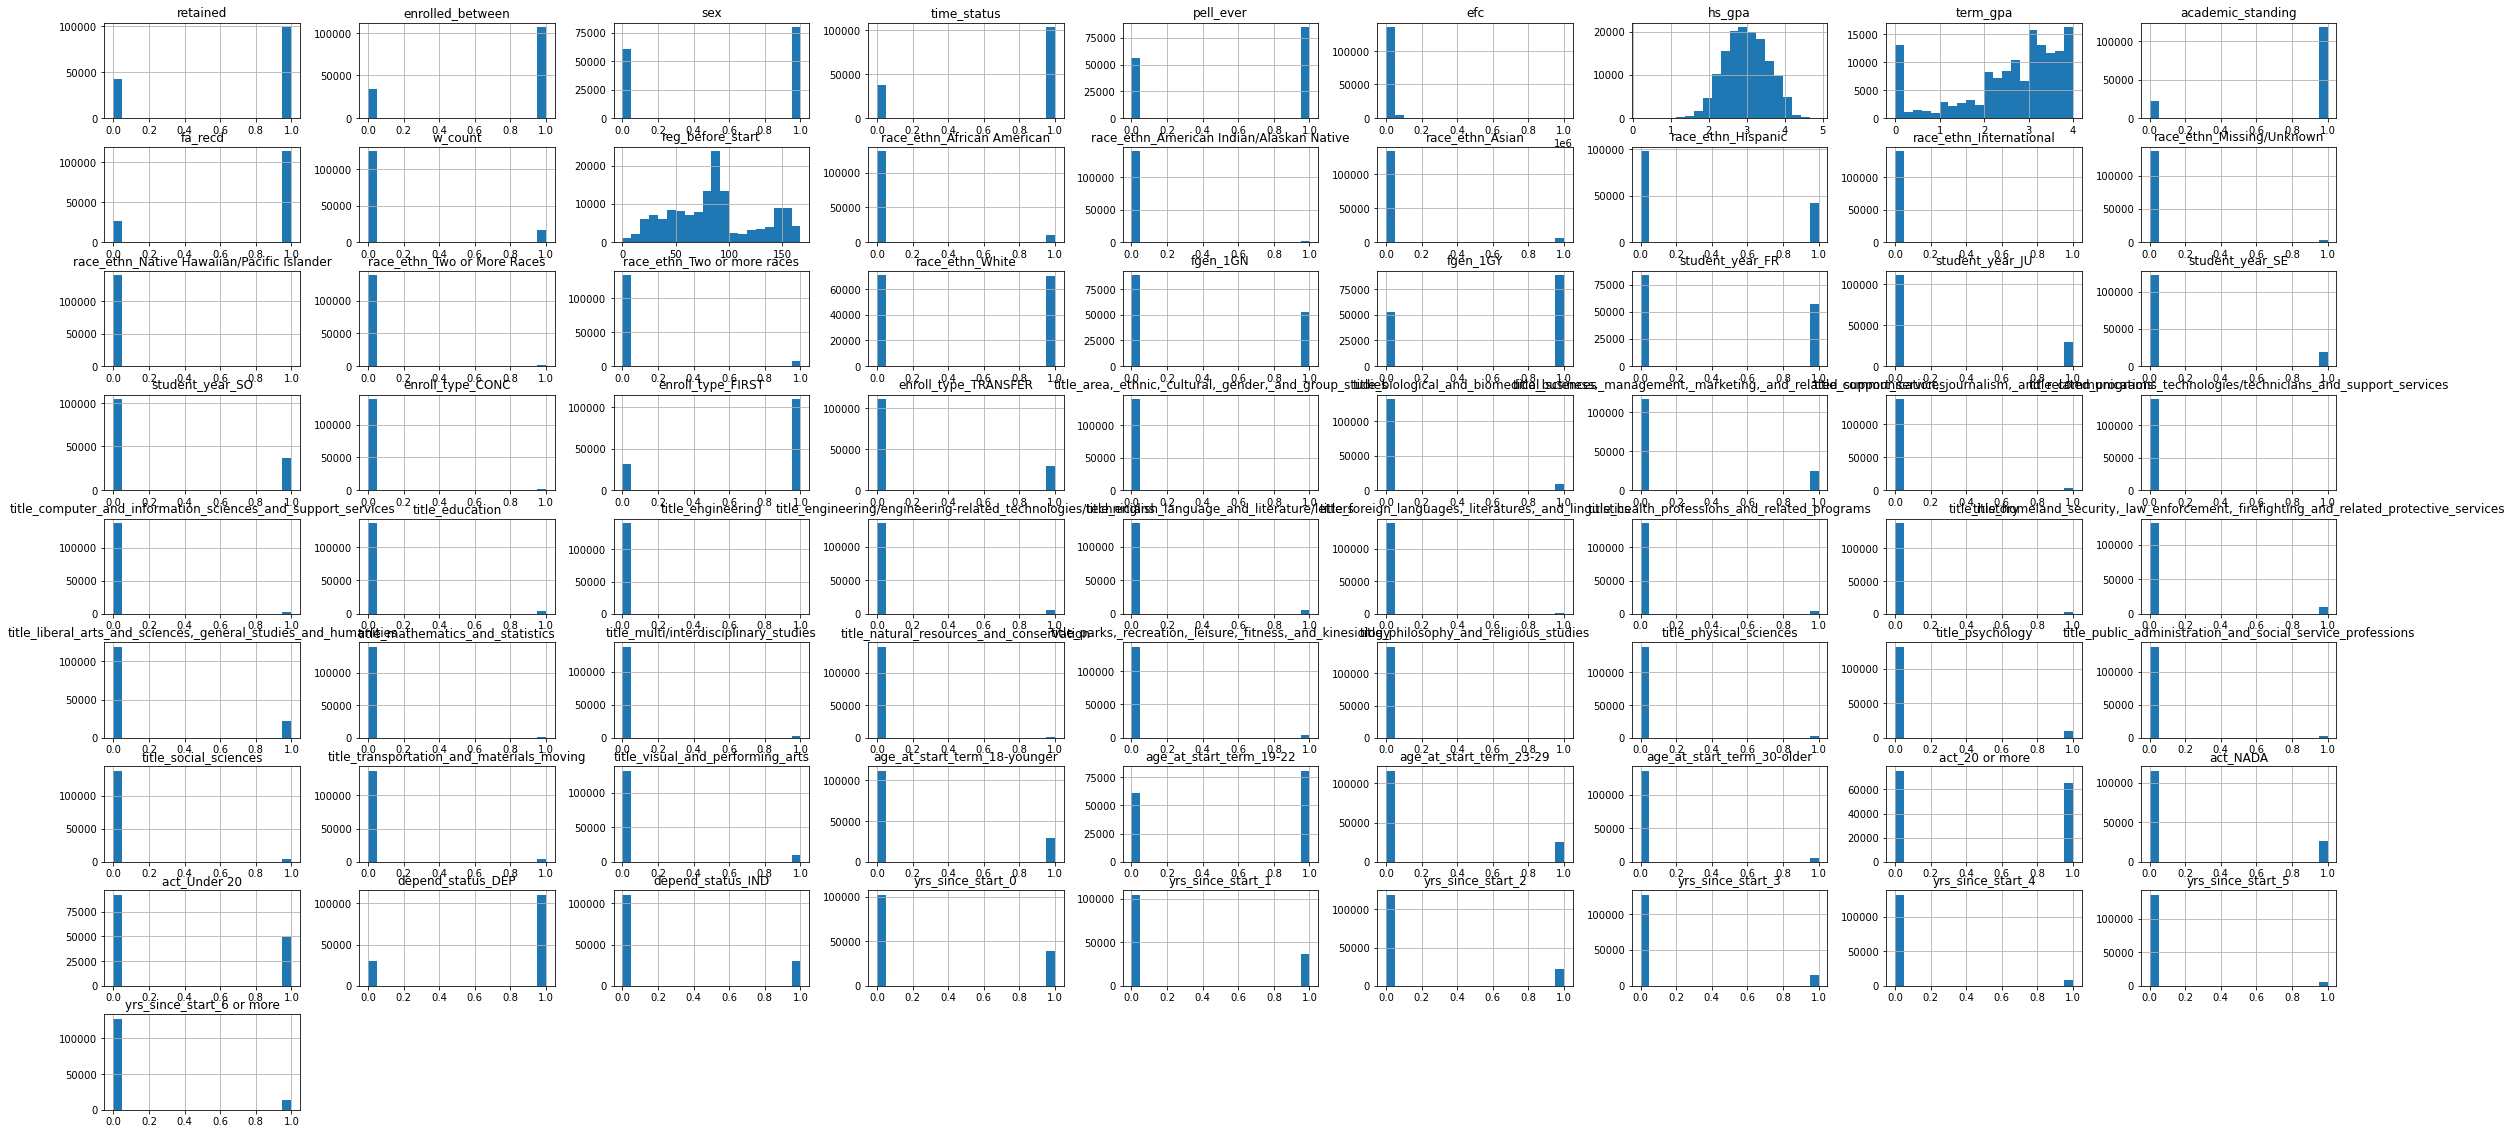

In [ ]:
students.hist(figsize=(40,20), bins =20)
plt.show()

- Explore term_gpa: spike near 0.0, spike near 4.0, 2.0 and higher seems to be a much larger group than 2.0 and below.
- Explore reg_before_start: spike between 75 and 100, below 75 higher than above 100, 
        - external research shows an average of 85 days for reg to spring semester and 140 for reg to fall (Possible Feature)
- hs_gpa shows a normal distribution around just below 3.0. Could be good for impute.
- efc looks suspect still

In [ ]:
variables = students.columns[students.dtypes == 'object']

for col in variables:
    print(f'{col}\n\n\n{students[col].value_counts(dropna=False)}\n\n')

race_ethn


White                               69912
Hispanic                            42604
African American                     9386
Two or more races                    6915
Asian                                6449
Missing/Unknown                      3420
Two or More Races                    1158
American Indian/Alaskan Native        781
Native Hawaiian/Pacific Islander      161
International                          14
Name: race_ethn, dtype: int64


fgen


1GY    88468
1GN    52327
1GX        5
Name: fgen, dtype: int64


student_year


FR    56911
SO    36253
JU    29364
SE    18272
Name: student_year, dtype: int64


enroll_type


FIRST       109795
TRANSFER     29772
CONC          1233
Name: enroll_type, dtype: int64


cip


52    24150
24    22124
50     9719
43     9654
42     9616
26     8584
23     5618
15     5374
13     4959
31     4735
51     4731
49     4432
45     3727
44     3409
11     3408
30     3322
9      3144
54     2536
40     2493
3      1549
16     1165
27

- One hot encode categorical columns
- Replace (1,0): retained, enrolled_between, sex, time_status, pell_ever, academic_standing, fa_recd, w_count
- Create dummies: race_ethn, fgen, student_year, enroll_type, cip, age_at_start_term, act, depend_status, yrs_before_start

In [ ]:
students.cip.value_counts(normalize = True)

52    0.171520
24    0.157131
50    0.069027
43    0.068565
42    0.068295
26    0.060966
23    0.039901
15    0.038168
13    0.035220
31    0.033629
51    0.033601
49    0.031477
45    0.026470
44    0.024212
11    0.024205
30    0.023594
9     0.022330
54    0.018011
40    0.017706
3     0.011001
16    0.008274
27    0.007763
14    0.003246
5     0.002855
38    0.002251
10    0.000582
Name: cip, dtype: float64

- 52: almost 19% 
- 24: 12% 
- 50, 42, 26: 6%
- 43, 13, 23, 15, 30, 51, 44, 31, 45, 11, 49, 54, 9, 40, 3, 27 between 5% and 1%
- 16, 38, 5, 14, 10, 1, 32, 29 below 1$

### Univariate Summary:

- efc: 1/3 missing, suspicious max (impute?)
- hs_gpa: 55% missing, potentially drop, normal distribution possibly (impute or drop?)
- term_gpa only missing a few, spike near 0.0, spike near 4.0, 2.0 and higher seems to be a much larger group than 2.0 and below. (possible clusters?)
- reg_before_start spike between 75 and 100, below 75 higher than above 100, external research shows an average of 85 days for reg to spring semester and 140 for reg to fall (Possible Feature, cluster or both)
- Change cip into major types and one hot encode
- Rank values by their Retention percentage (feature?)

##  Bivariate (Train df used)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78848 entries, 46406 to 92219
Data columns (total 83 columns):
 #   Column                                                                                  Non-Null Count  Dtype  
---  ------                                                                                  --------------  -----  
 0   retained                                                                                78848 non-null  int64  
 1   enrolled_between                                                                        78848 non-null  int64  
 2   race_ethn                                                                               78848 non-null  object 
 3   sex                                                                                     78848 non-null  int64  
 4   time_status                                                                             78848 non-null  int64  
 5   fgen                                                           

race_ethn

--------------------------------------------------------------
retained  race_ethn                       
1         White                               28104
          Hispanic                            16401
0         White                               11111
          Hispanic                             7365
1         African American                     3328
          Asian                                2706
          Two or more races                    2644
0         African American                     1950
1         Missing/Unknown                      1298
0         Two or more races                    1267
          Asian                                 879
          Missing/Unknown                       598
1         Two or More Races                     435
          American Indian/Alaskan Native        288
0         Two or More Races                     211
          American Indian/Alaskan Native        157
1         Native Hawaiian/Pacific Islander       64

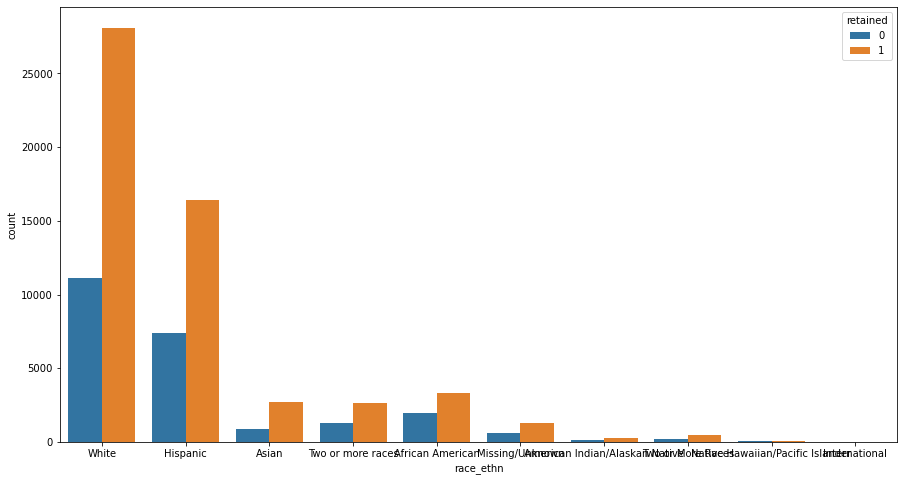

race_ethn                         retained
International                     1           0.900000
Asian                             1           0.754812
White                             1           0.716665
Hispanic                          1           0.690104
Missing/Unknown                   1           0.684599
Two or more races                 1           0.676042
Two or More Races                 1           0.673375
Native Hawaiian/Pacific Islander  1           0.666667
American Indian/Alaskan Native    1           0.647191
African American                  1           0.630542
                                  0           0.369458
American Indian/Alaskan Native    0           0.352809
Native Hawaiian/Pacific Islander  0           0.333333
Two or More Races                 0           0.326625
Two or more races                 0           0.323958
Missing/Unknown                   0           0.315401
Hispanic                          0           0.309896
White                 

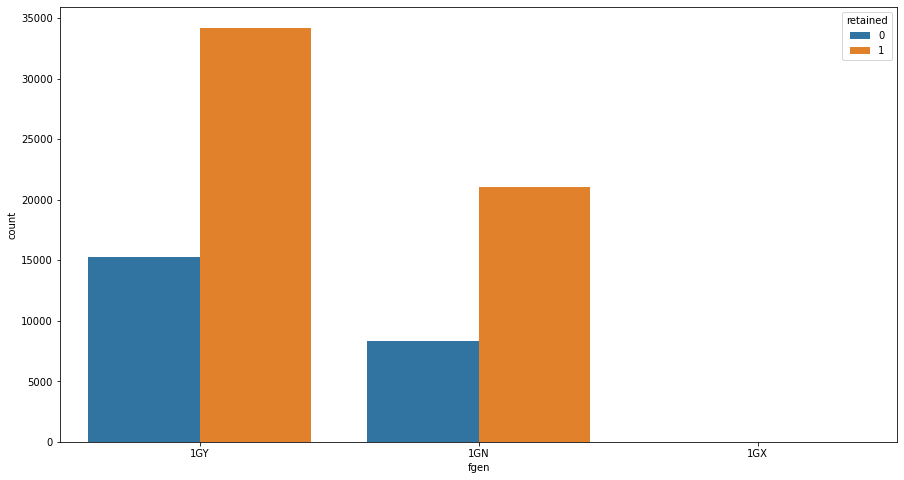

fgen  retained
1GN   1           0.716365
1GY   1           0.691962
1GX   0           0.500000
      1           0.500000
1GY   0           0.308038
1GN   0           0.283635
Name: retained, dtype: float64


student_year

--------------------------------------------------------------
retained  student_year
1         FR              18358
          SO              15261
          JU              13772
0         FR              13455
1         SE               7886
0         SO               5038
          JU               2705
          SE               2373
Name: student_year, dtype: int64


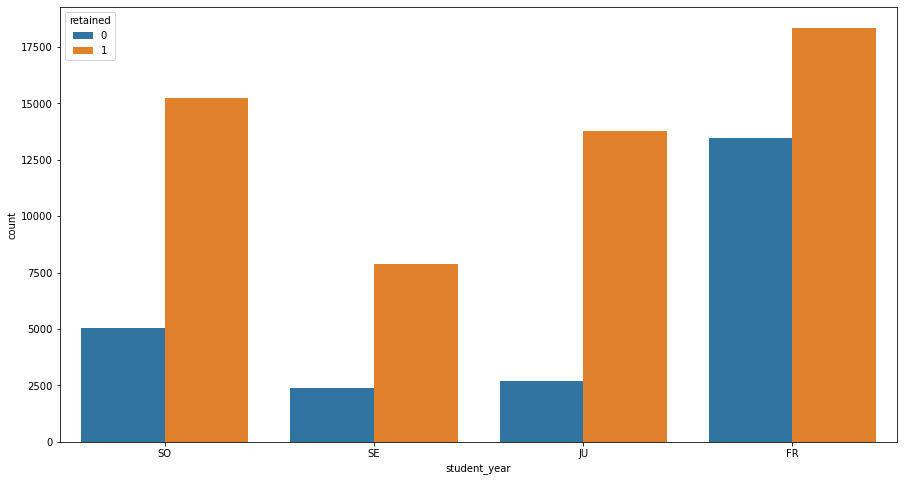

student_year  retained
JU            1           0.835832
SE            1           0.768691
SO            1           0.751810
FR            1           0.577060
              0           0.422940
SO            0           0.248190
SE            0           0.231309
JU            0           0.164168
Name: retained, dtype: float64


enroll_type

--------------------------------------------------------------
retained  enroll_type
1         FIRST          43125
0         FIRST          18300
1         TRANSFER       11693
0         TRANSFER        5062
1         CONC             459
0         CONC             209
Name: enroll_type, dtype: int64


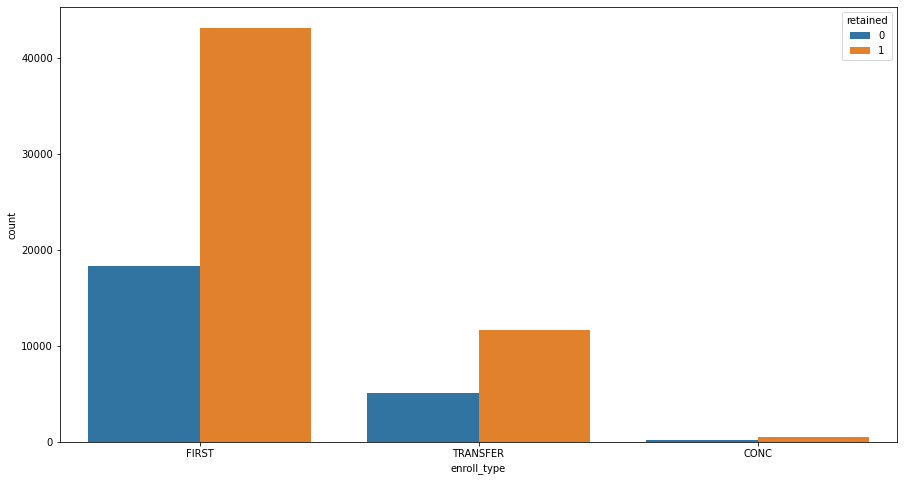

enroll_type  retained
FIRST        1           0.702076
TRANSFER     1           0.697881
CONC         1           0.687126
             0           0.312874
TRANSFER     0           0.302119
FIRST        0           0.297924
Name: retained, dtype: float64


cip

--------------------------------------------------------------
retained  cip
1         52     9818
          24     7395
0         24     4948
1         42     3840
          43     3818
0         52     3774
1         50     3749
          26     3339
          23     2438
          13     2091
          15     2084
          31     1969
          51     1858
          49     1759
0         50     1626
          43     1568
          42     1525
1         45     1491
          44     1469
          30     1427
0         26     1413
1         11     1332
          9      1280
          54     1062
          40     1045
0         15      903
          23      790
          51      790
          49      727
          13      705

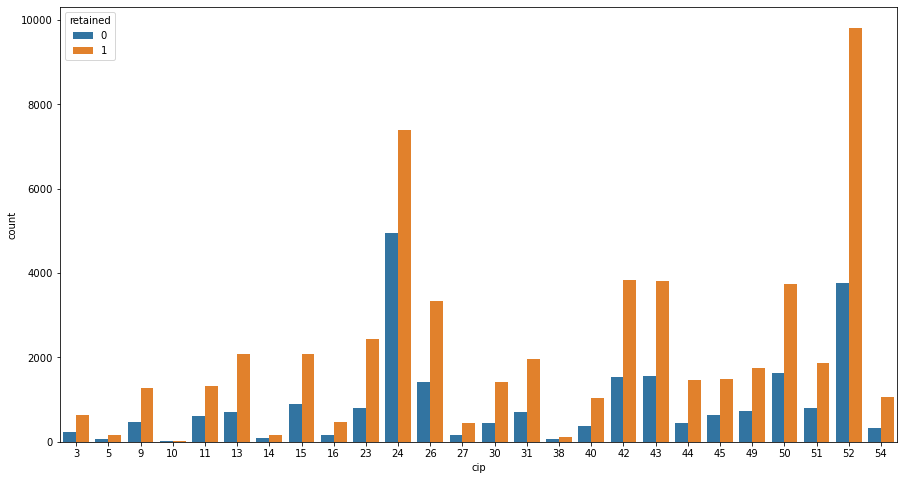

cip  retained
54   1           0.769565
44   1           0.765503
30   1           0.762286
23   1           0.755266
13   1           0.747854
27   1           0.744224
16   1           0.741325
31   1           0.736901
40   1           0.736434
9    1           0.728515
3    1           0.727377
52   1           0.722337
42   1           0.715750
43   1           0.708875
49   1           0.707562
45   1           0.704299
26   1           0.702652
51   1           0.701662
15   1           0.697690
50   1           0.697488
5    1           0.683036
11   1           0.682727
14   1           0.678431
38   1           0.632184
24   1           0.599125
10   1           0.567568
     0           0.432432
24   0           0.400875
38   0           0.367816
14   0           0.321569
11   0           0.317273
5    0           0.316964
50   0           0.302512
15   0           0.302310
51   0           0.298338
26   0           0.297348
45   0           0.295701
49   0           0.29243

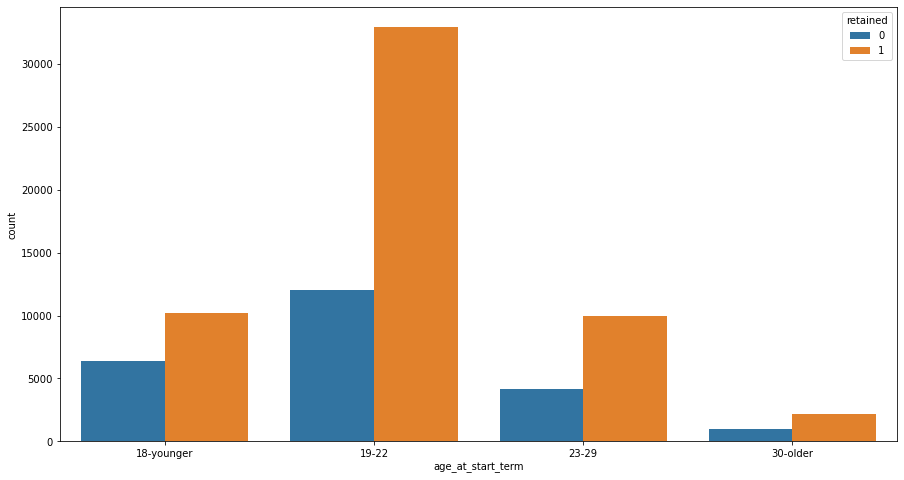

age_at_start_term  retained
19-22              1           0.732289
23-29              1           0.707044
30-older           1           0.683184
18-younger         1           0.614730
                   0           0.385270
30-older           0           0.316816
23-29              0           0.292956
19-22              0           0.267711
Name: retained, dtype: float64


act

--------------------------------------------------------------
retained  act       
1         20 or more    26759
          Under 20      18993
0         20 or more    10046
1         NADA           9525
0         Under 20       8339
          NADA           5186
Name: act, dtype: int64


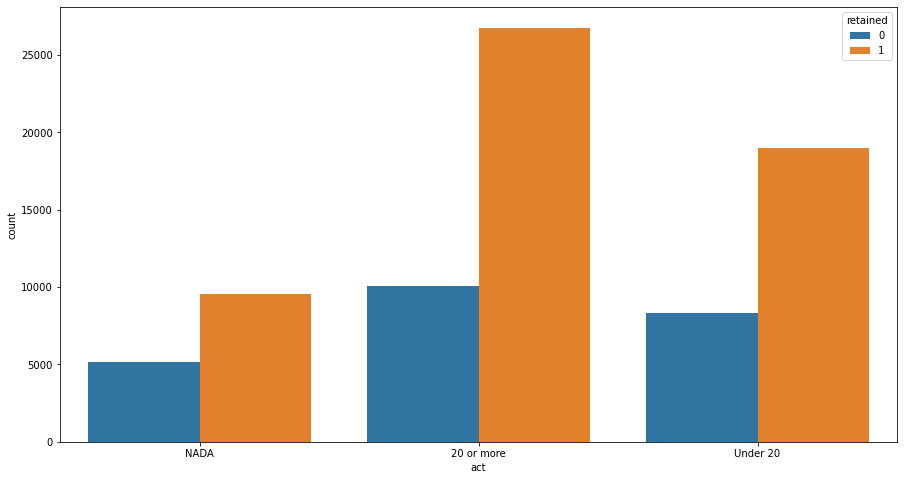

act         retained
20 or more  1           0.727048
Under 20    1           0.694900
NADA        1           0.647475
            0           0.352525
Under 20    0           0.305100
20 or more  0           0.272952
Name: retained, dtype: float64


depend_status

--------------------------------------------------------------
retained  depend_status
1         DEP              43485
0         DEP              18182
1         IND              11792
0         IND               5389
Name: depend_status, dtype: int64


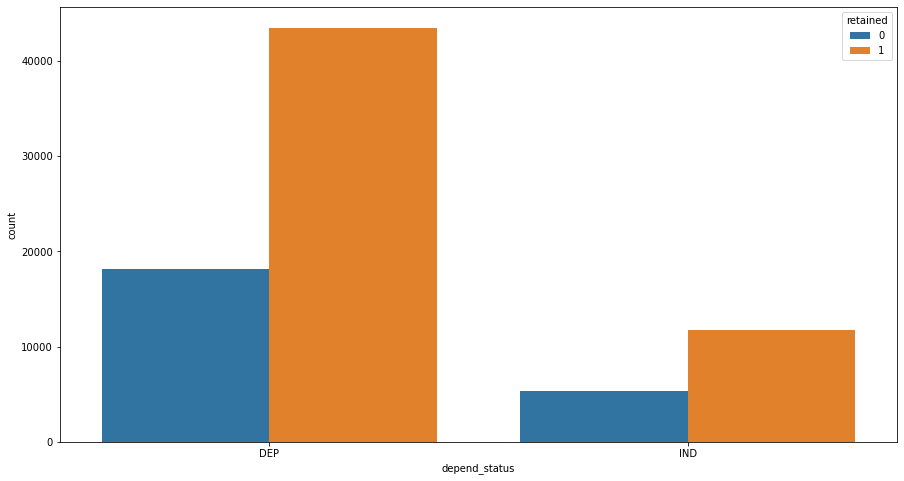

depend_status  retained
DEP            1           0.705158
IND            1           0.686340
               0           0.313660
DEP            0           0.294842
Name: retained, dtype: float64


yrs_since_start

--------------------------------------------------------------
retained  yrs_since_start
1         1                  14034
          0                  13301
          2                   9667
0         0                   8663
1         3                   6551
0         1                   6401
1         6 or more           5509
          4                   3927
0         2                   2723
          6 or more           2428
1         5                   2288
0         3                   1520
          4                   1094
          5                    742
Name: yrs_since_start, dtype: int64


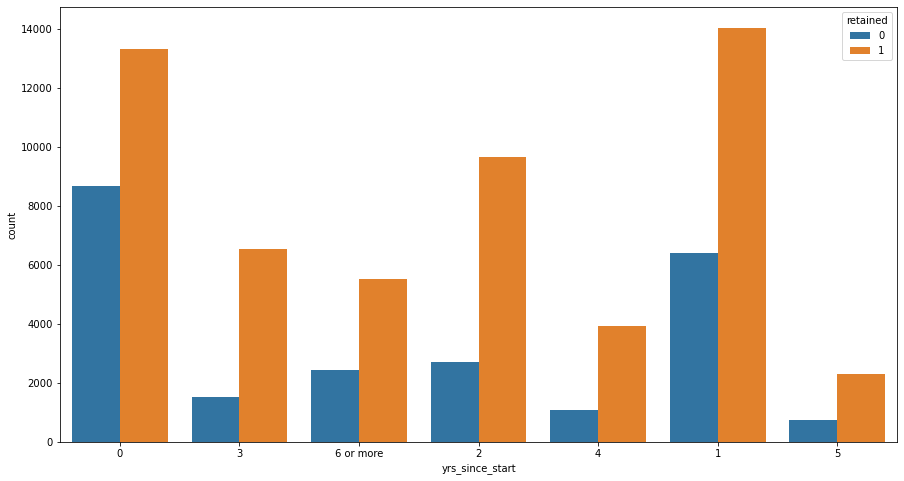

yrs_since_start  retained
3                1           0.811671
4                1           0.782115
2                1           0.780226
5                1           0.755116
6 or more        1           0.694091
1                1           0.686763
0                1           0.605582
                 0           0.394418
1                0           0.313237
6 or more        0           0.305909
5                0           0.244884
2                0           0.219774
4                0           0.217885
3                0           0.188329
Name: retained, dtype: float64


title

--------------------------------------------------------------
retained  title                                                                           
1         business,_management,_marketing,_and_related_support_services                       9818
          liberal_arts_and_sciences,_general_studies_and_humanities                           7395
0         liberal_arts_and_sciences,_general_studi

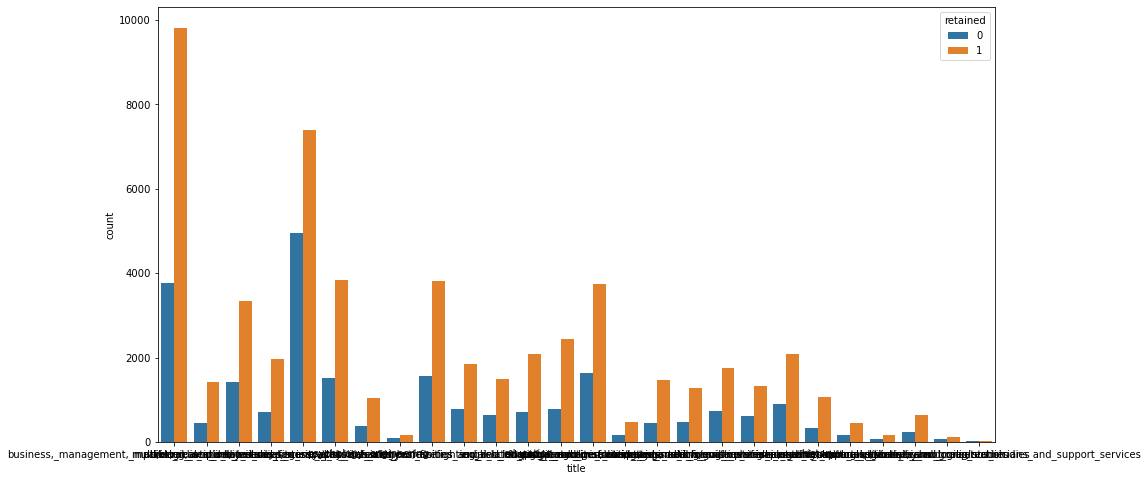

title                                                                             retained
history                                                                           1           0.769565
public_administration_and_social_service_professions                              1           0.765503
multi/interdisciplinary_studies                                                   1           0.762286
english_language_and_literature/letters                                           1           0.755266
education                                                                         1           0.747854
mathematics_and_statistics                                                        1           0.744224
foreign_languages,_literatures,_and_linguistics                                   1           0.741325
parks,_recreation,_leisure,_fitness,_and_kinesiology                              1           0.736901
physical_sciences                                                                 1  

In [ ]:
columns = train.columns[train.dtypes == 'object']
for col in columns:
    plt.figure(figsize=(15,8))
    print(f'{col}\n\n--------------------------------------------------------------')
    print(f'{train.groupby("retained")[col].value_counts().sort_values(ascending=False)}')
    sns.countplot(train[col], hue=train['retained'])
    plt.show()
    print(f'{train.groupby(col)["retained"].value_counts(normalize=True).sort_values(ascending=False)}')
    print(f'=======================================================\n\n')

retained

--------------------------------------------------------------


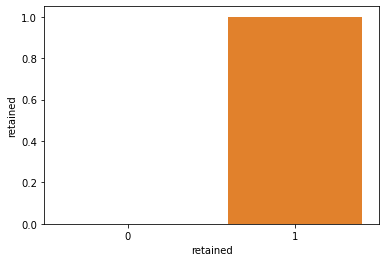



enrolled_between

--------------------------------------------------------------


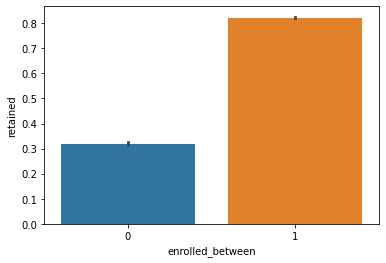



sex

--------------------------------------------------------------


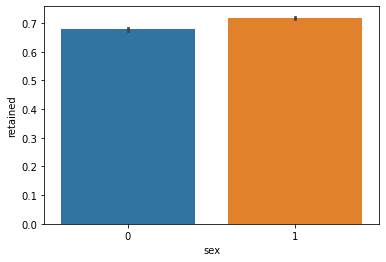



time_status

--------------------------------------------------------------


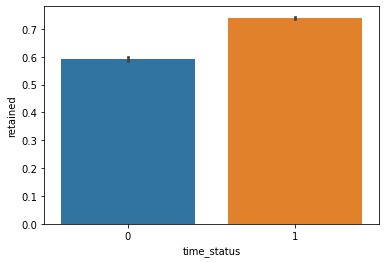



pell_ever

--------------------------------------------------------------


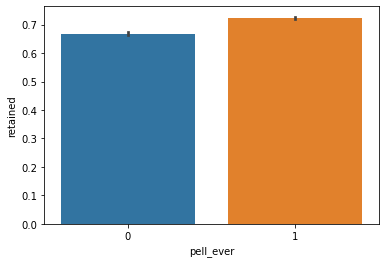



efc

--------------------------------------------------------------


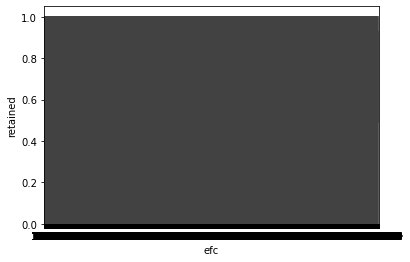



hs_gpa

--------------------------------------------------------------


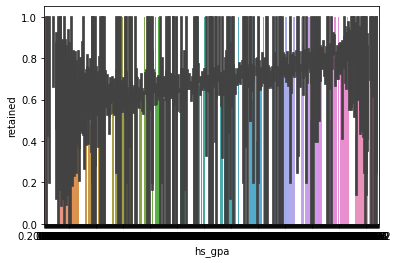



term_gpa

--------------------------------------------------------------


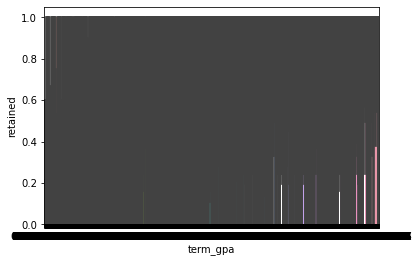



academic_standing

--------------------------------------------------------------


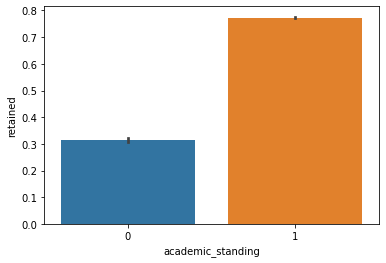



fa_recd

--------------------------------------------------------------


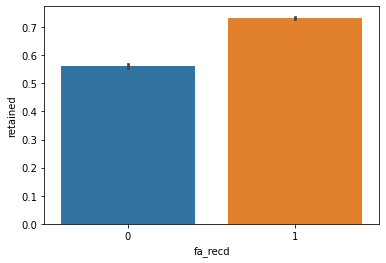



w_count

--------------------------------------------------------------


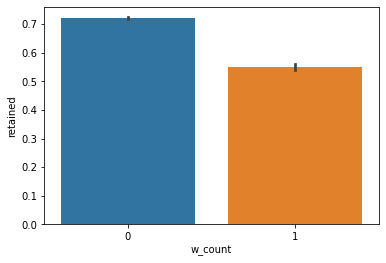



reg_before_start

--------------------------------------------------------------


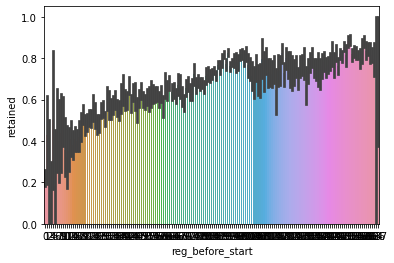



race_ethn_African American

--------------------------------------------------------------


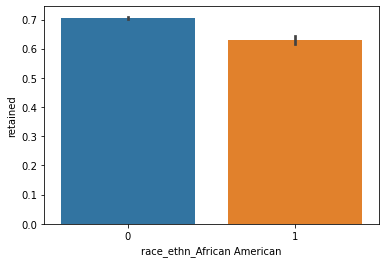



race_ethn_American Indian/Alaskan Native

--------------------------------------------------------------


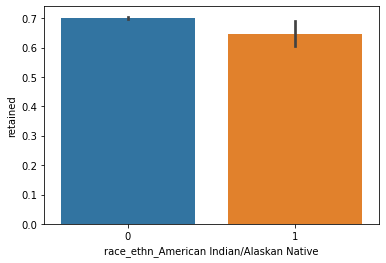



race_ethn_Asian

--------------------------------------------------------------


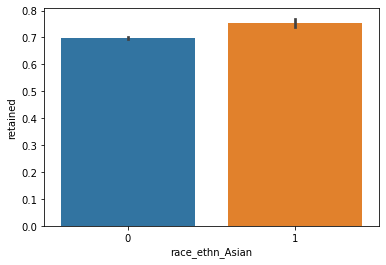



race_ethn_Hispanic

--------------------------------------------------------------


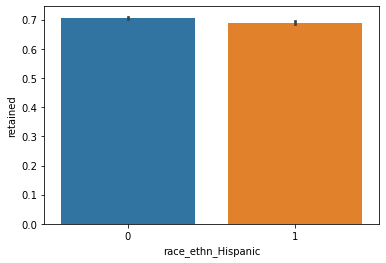



race_ethn_International

--------------------------------------------------------------


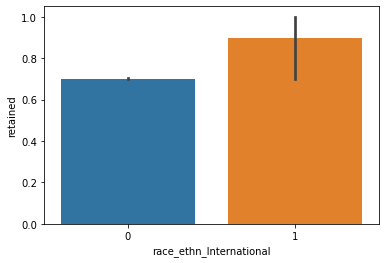



race_ethn_Missing/Unknown

--------------------------------------------------------------


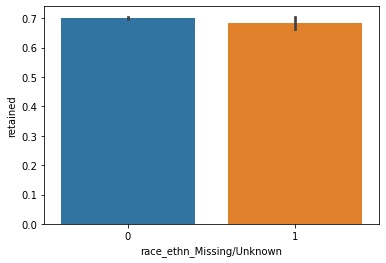



race_ethn_Native Hawaiian/Pacific Islander

--------------------------------------------------------------


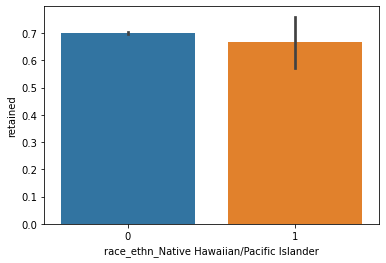



race_ethn_Two or More Races

--------------------------------------------------------------


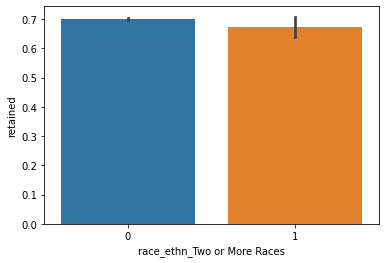



race_ethn_Two or more races

--------------------------------------------------------------


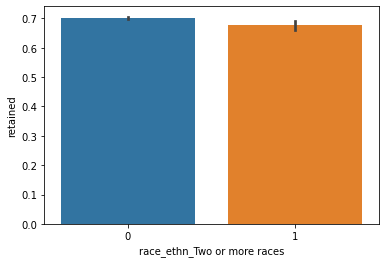



race_ethn_White

--------------------------------------------------------------


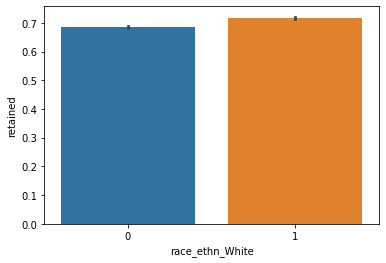



fgen_1GN

--------------------------------------------------------------


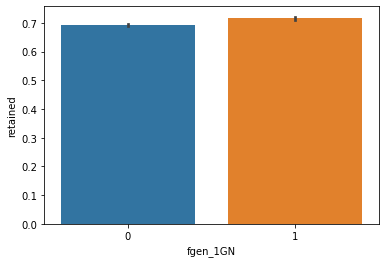



fgen_1GY

--------------------------------------------------------------


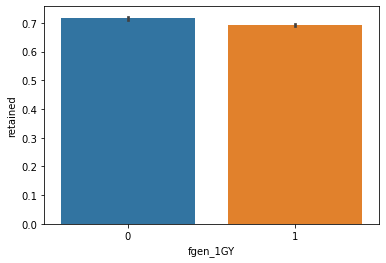



student_year_FR

--------------------------------------------------------------


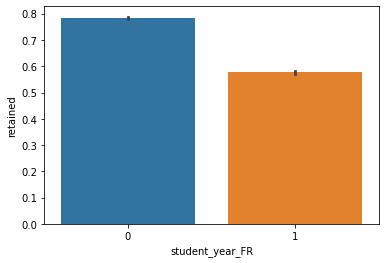



student_year_JU

--------------------------------------------------------------


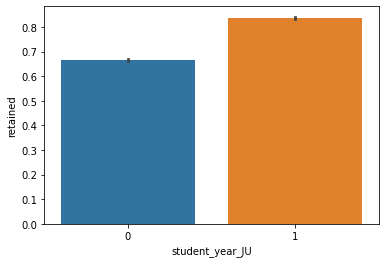



student_year_SE

--------------------------------------------------------------


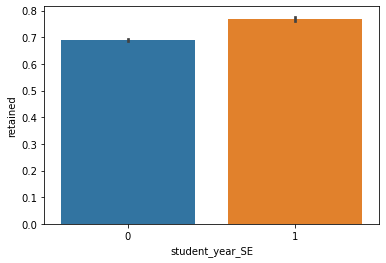



student_year_SO

--------------------------------------------------------------


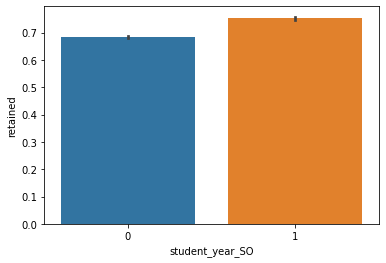



enroll_type_CONC

--------------------------------------------------------------


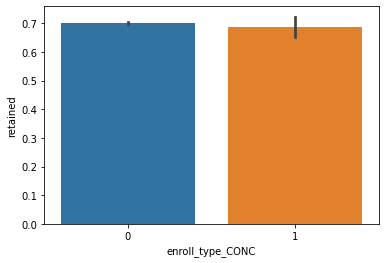



enroll_type_FIRST

--------------------------------------------------------------


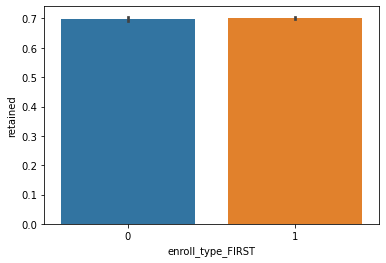



enroll_type_TRANSFER

--------------------------------------------------------------


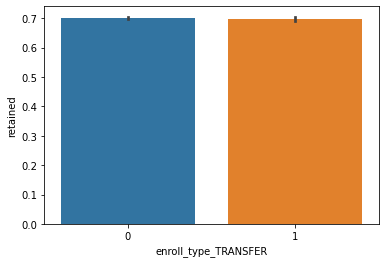



title_area,_ethnic,_cultural,_gender,_and_group_studies

--------------------------------------------------------------


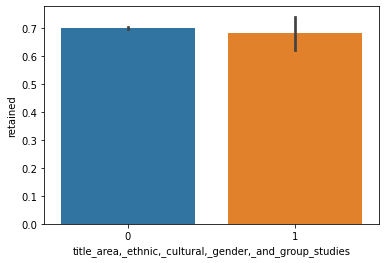



title_biological_and_biomedical_sciences

--------------------------------------------------------------


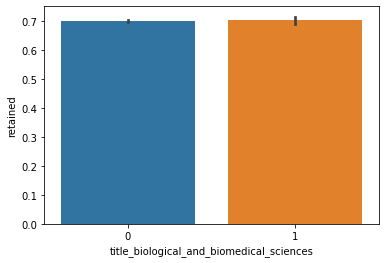



title_business,_management,_marketing,_and_related_support_services

--------------------------------------------------------------


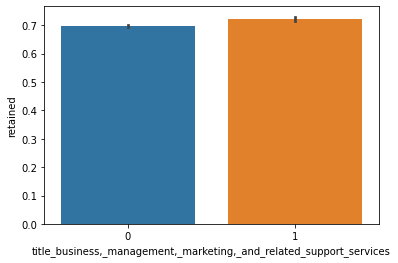



title_communication,_journalism,_and_related_programs

--------------------------------------------------------------


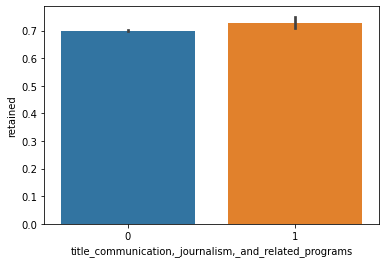



title_communications_technologies/technicians_and_support_services

--------------------------------------------------------------


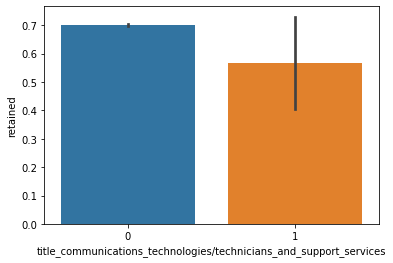



title_computer_and_information_sciences_and_support_services

--------------------------------------------------------------


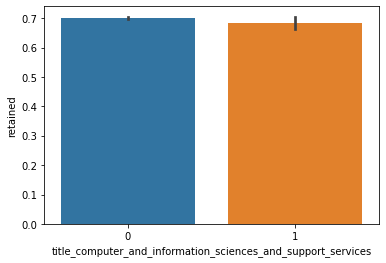



title_education

--------------------------------------------------------------


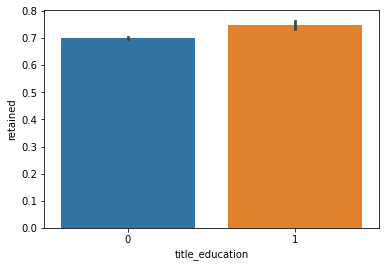



title_engineering

--------------------------------------------------------------


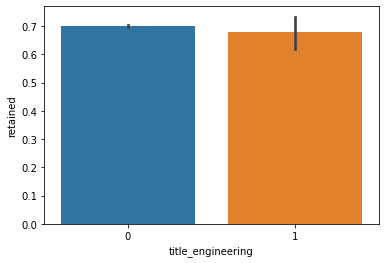



title_engineering/engineering-related_technologies/technicians

--------------------------------------------------------------


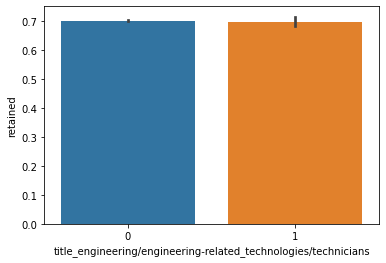



title_english_language_and_literature/letters

--------------------------------------------------------------


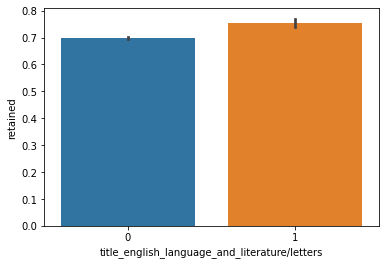



title_foreign_languages,_literatures,_and_linguistics

--------------------------------------------------------------


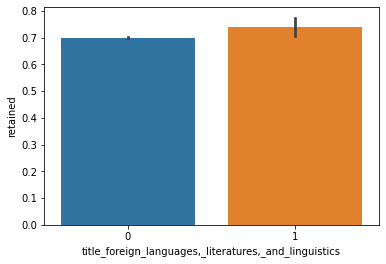



title_health_professions_and_related_programs

--------------------------------------------------------------


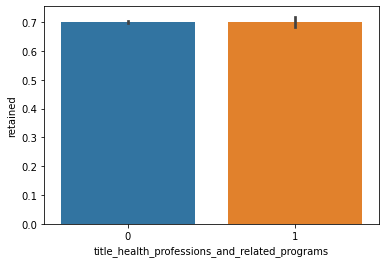



title_history

--------------------------------------------------------------


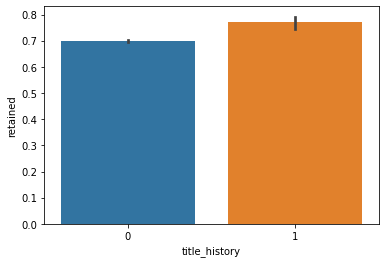



title_homeland_security,_law_enforcement,_firefighting_and_related_protective_services

--------------------------------------------------------------


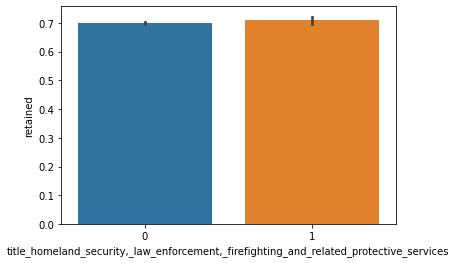



title_liberal_arts_and_sciences,_general_studies_and_humanities

--------------------------------------------------------------


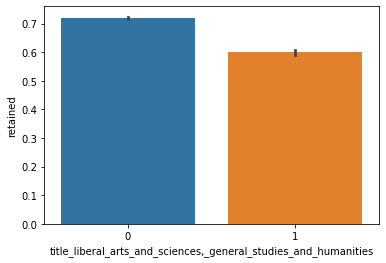



title_mathematics_and_statistics

--------------------------------------------------------------


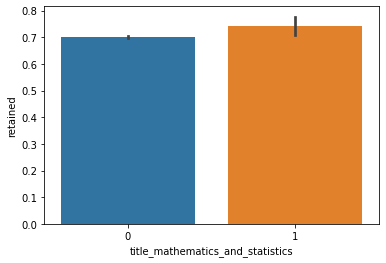



title_multi/interdisciplinary_studies

--------------------------------------------------------------


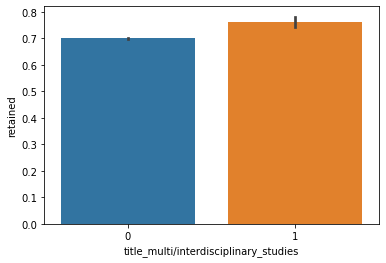



title_natural_resources_and_conservation

--------------------------------------------------------------


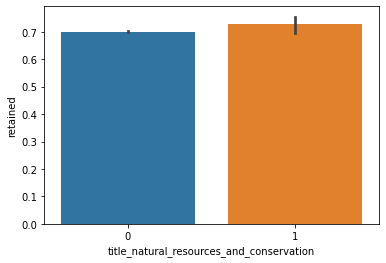



title_parks,_recreation,_leisure,_fitness,_and_kinesiology

--------------------------------------------------------------


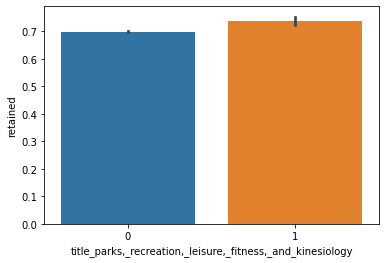



title_philosophy_and_religious_studies

--------------------------------------------------------------


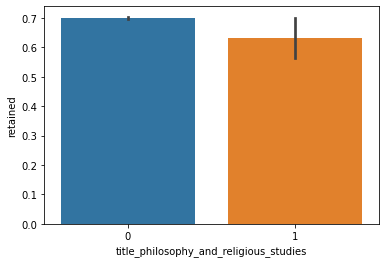



title_physical_sciences

--------------------------------------------------------------


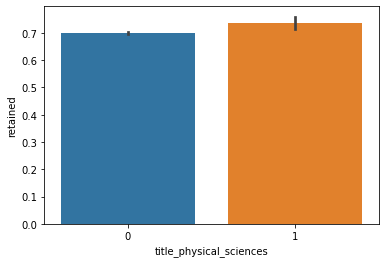



title_psychology

--------------------------------------------------------------


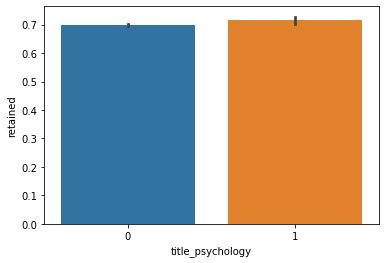



title_public_administration_and_social_service_professions

--------------------------------------------------------------


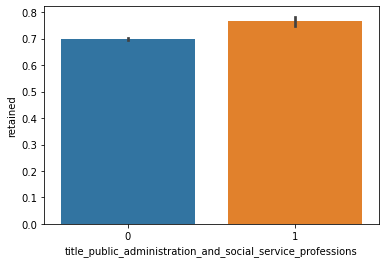



title_social_sciences

--------------------------------------------------------------


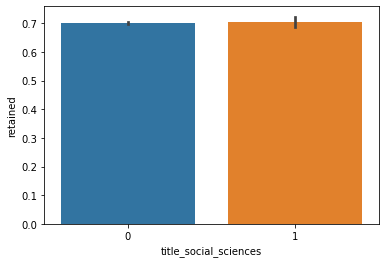



title_transportation_and_materials_moving

--------------------------------------------------------------


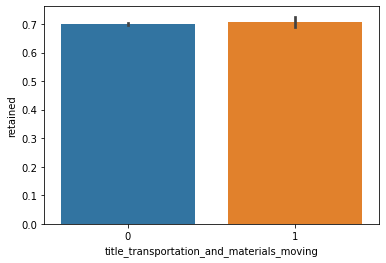



title_visual_and_performing_arts

--------------------------------------------------------------


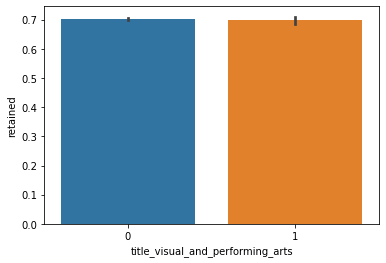



age_at_start_term_18-younger

--------------------------------------------------------------


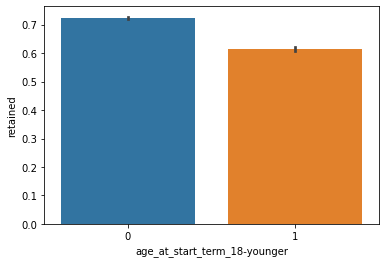



age_at_start_term_19-22

--------------------------------------------------------------


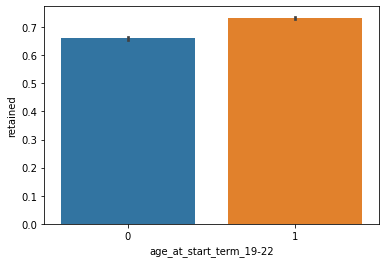



age_at_start_term_23-29

--------------------------------------------------------------


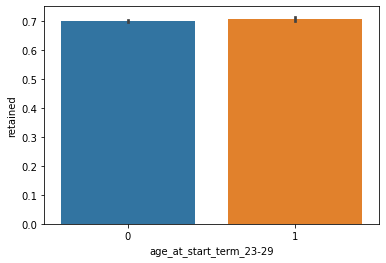



age_at_start_term_30-older

--------------------------------------------------------------


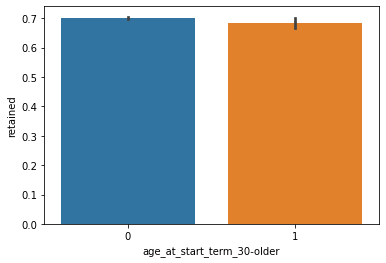



act_20 or more

--------------------------------------------------------------


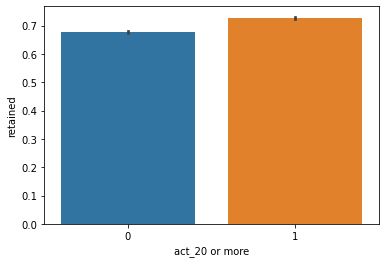



act_NADA

--------------------------------------------------------------


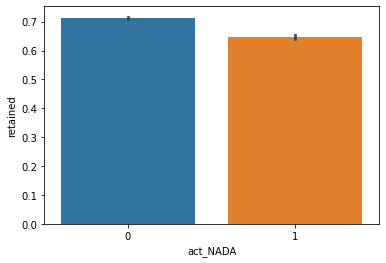



act_Under 20

--------------------------------------------------------------


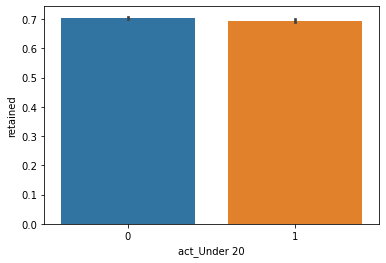



depend_status_DEP

--------------------------------------------------------------


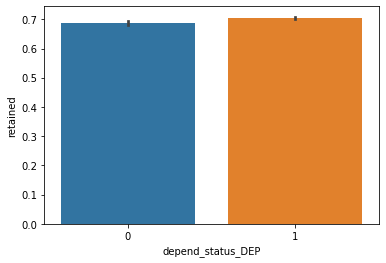



depend_status_IND

--------------------------------------------------------------


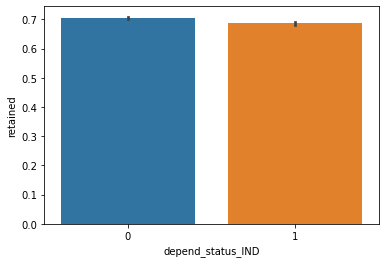



yrs_since_start_0

--------------------------------------------------------------


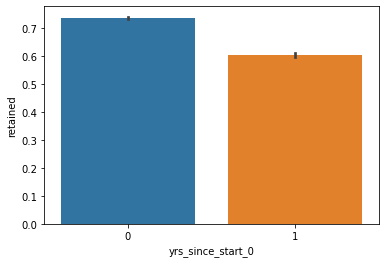



yrs_since_start_1

--------------------------------------------------------------


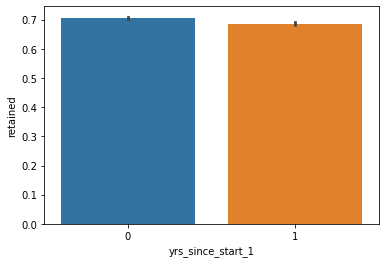



yrs_since_start_2

--------------------------------------------------------------


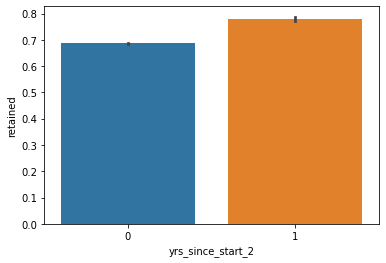



yrs_since_start_3

--------------------------------------------------------------


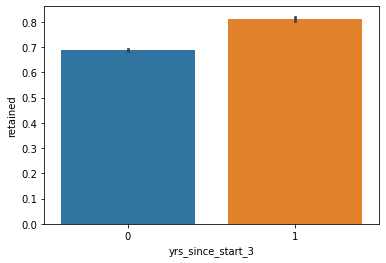



yrs_since_start_4

--------------------------------------------------------------


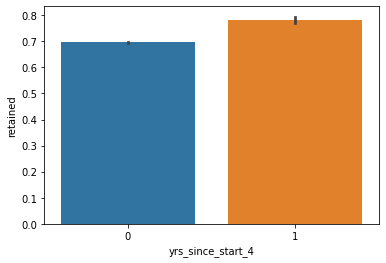



yrs_since_start_5

--------------------------------------------------------------


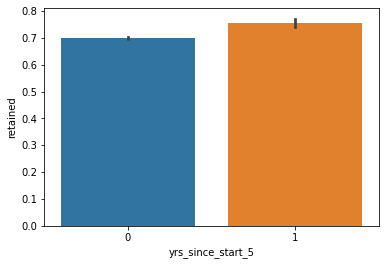



yrs_since_start_6 or more

--------------------------------------------------------------


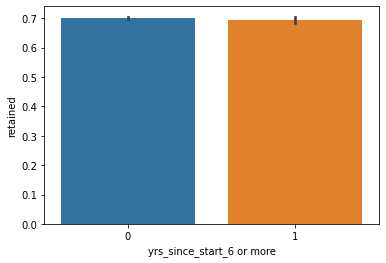

In [ ]:
columns = train.columns[(train.dtypes == 'int') | (train.dtypes == 'float') | (train.dtypes == 'uint8')]
# print(f'Not Retained:\n\n')
# print(f'{train[train["retained"]=="N"].describe()}\n')
# print(f'Retained:\n\n')
# print(f'{train[train["retained"]=="Y"].describe()}\n')
for col in columns:
    print(f'{col}\n\n--------------------------------------------------------------')
    sns.barplot(x=col, y='retained', data= train)
    plt.show()
    print(f'=======================================================\n\n')

In [ ]:
sns.pairplot(train, kind='reg', plot_kws={'line_kws':{'color':'red'}},corner=True)

In [ ]:
# # Perform a Pearson Correlation on the dataset
plt.figure(figsize=(4,20))
correlate = train.corr()
# Plot the Correlation on a heatmap
sns.heatmap(correlate.loc[['retained']].T, annot=True, cmap='coolwarm')
plt.show()

- slight correlation between enrolled_between, term_gpa, academic standing. with a slight negative correlation to freshman status

In [ ]:
plt.figure(figsize=(15,8))
sns.relplot(x='term_gpa',y='reg_before_start',data=train,col='retained',row='title',height=10)
plt.show()

### Bivariate Summary: 

- race_ethn: mostly white/hispanic population
- fgen: mostly first generation with little difference in retention
- year: negative correlation between class year and population size. Juniors had the highest retention rate. 
- enroll_type: most students were first time college students out of high school. Did not show much difference in retention between different types.
- cip: 52, 24 had highest population, 42,43,50,26 followed with next biggest group. (POSSIBLE CLUSTERS) Out of big groups 24 showed the lowest retention rate.
- age: 19-22 by far the largest population. 18 and under had lowest retention(did they transfer?)
- yr_since_start: 0 had lowest retention, 1 and 6 or more had next lowest, 5, 2, 4, 3 (EXPLORE IN MULTI)

Following showed low retention stutus
- w_count
- communication major
- computer information systems
- engineering
- liberal arts
- philosophy and religious studies
- 18 or younger
- 23 to 29
- act_NADA
- depend_status_IND
-yrs_since_start_0
-yrs_since_start_1



## Questions

## Question 1: How did area of study affect retention?

In [ ]:
ax = sns.catplot(x='retained',col='cip',col_wrap=9,data=train,kind='count')
ax.set_xticklabels(rotation=90)

#### Chi Sqaured Hypothesis Test

- $H_o$: Area of study is independent of whether or not someone is retained.
- $H_α$: Area of study is not imdependent of whether or not someone is retained.

In [ ]:
contingency_table = pd.crosstab(train.title , train.retained)
contingency_table

In [ ]:
chi2, p, degf, expected = stats.chi2_contingency(contingency_table)

print('Observed\n')
print(contingency_table.values)
print('---\nExpected\n')
print(expected)
print('---\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')
print(f'degree of freedom = {degf}')

- We reject the null hypothesis.

#### Question 1 Summary: Out of the areas of study that had retention rates below the mean overall retention rate liberal_arts, visual_and_performing_arts and engineering had the biggest portions of the population. Using a Chi^2 test we that retention has a statistically significant association with area of study.

#### Attempts were made Q1

In [ ]:
def get_below_avg_retention():
    # Count of instances of study catagory
    count = list(train.title.value_counts().sort_index().values)
    # Percent of each area of study to the whole
    percent = [round(num, 4) for num in list(train.title.value_counts(normalize=True).sort_index().values)]
    # Percent of retained in each area of study
    percent_retained = list(train[['retained','title']].groupby('title').mean().round(4).retained.values)
    # Percent not retained in each area of study
    percent_not_retained = [round(num , 4) for num in list(1 - train[['retained','title']].groupby('title').mean().sort_index().retained.values)]
    # Mean retention rate of all instances
    overall_mean_retention = train.retained.mean()
    # Variable names for df assignment
    columns = list(train.title.sort_values().unique())
    # Create Df
    study_df = pd.DataFrame([count, percent, percent_retained, percent_not_retained] , index = ['count','percent','percent_retained','percent_not_retained'] ,columns = columns).T.reset_index()
    # Show areas of study with less retention than the average and sort by not retained
    df_q1 = study_df[study_df['percent_retained'] < overall_mean_retention].sort_values(by='percent_not_retained',ascending=False)
    # return df
    return df_q1

In [ ]:
df_q1 = get_below_avg_retention()

In [ ]:
plt.figure(figsize=(12,8))
ax = sns.barplot(x='index',y ='percent',data=df_q1)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('Percent',fontsize=20)
plt.xlabel('Major', fontsize=20)
plt.show()
plt.show()

In [ ]:
plt.figure(figsize=(12,8))
ax = sns.barplot(x='index',y ='percent_not_retained',data=df_q1)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('Percent Not Retained',fontsize=20)
plt.xlabel('Major', fontsize=20)
plt.show()

In [ ]:
# Count of full dataset
len(train)

- 78848

In [ ]:
# Individual count of retention
train.retained.value_counts()

- 1: 55277
- 0: 23571

In [ ]:
# Count of all retained values
train.retained.value_counts().sum()

- 78848

In [ ]:
# value counts of titles
train.title.value_counts().sort_index()

In [ ]:
# Sum of value counts of titles
train.title.value_counts().sum()

- 78848

In [ ]:
# Value Counts of not retained titles
train[train['retained'] == 0]['title'].value_counts().sort_index()

In [ ]:
# Sum of value counts of not retained titles
train[train['retained'] == 0]['title'].value_counts().sort_index().sum()

- 23571

In [ ]:
# Value Counts of retained titles
train[train['retained'] == 1]['title'].value_counts().sort_index()

In [ ]:
# Summ of value counts of retained titles
train[train['retained'] == 1]['title'].value_counts().sort_index().sum()

- 55277

In [ ]:
# Value Counts of all titles
train[['retained','title']]['title'].value_counts().sort_index()

In [ ]:
# Sum of value counts of all titles
train[['retained','title']]['title'].value_counts().sort_index().sum()

- 78848

In [ ]:
ax = sns.scatterplot(x='index',y='percent_not_retained',data=study_df)
ax.set_xticklabels(study_df['index'], rotation=90)
plt.show()

In [ ]:
# Assign figure size
plt.figure(figsize=(12,7))
# Use Squarify to create a tree map of segment counts
squarify.plot(sizes=cip_df['count'], 
              label=cip_df['index'],
              value=cip_df['percent'],
              color = ['tab:blue','tab:orange','tab:green','tab:red','tab:purple','tab:brown','tab:olive','tab:cyan'],
              text_kwargs={'fontsize': 17})
# Assign titles
plt.title('CIP by Count', fontsize=27)
plt.axis('off')
plt.show()

In [ ]:
# Assign figure size
plt.figure(figsize=(12,7))
# Use Squarify to create a tree map of segment counts
squarify.plot(sizes=df['count'], 
              label=df['index'],
              value=df['percent_not_retained'],
              color = ['tab:blue','tab:orange','tab:green','tab:red','tab:purple','tab:brown','tab:olive','tab:cyan'],
              text_kwargs={'fontsize': 17})
# Assign titles
plt.title('CIP by Count', fontsize=27)
plt.axis('off')
plt.show()

In [ ]:
# Count of instances of study catagory
count = list(train.cip.value_counts().sort_index().values)
# Percent of each area of study to the whole
percent = [round(num, 4) for num in list(train.cip.value_counts(normalize=True).sort_index().values)]
# Percent of retained in each area of study
percent_retained = list(train[['retained','cip']].groupby('cip').mean().round(4).retained.values)
# Percent not retained in each area of study
percent_not_retained = [round(num , 4) for num in list(1 - train[['retained','cip']].groupby('cip').mean().sort_index().retained.values)]
# Mean retention rate of all instances
overall_mean_retention = train.retained.mean()
# Variable names for df assignment
cip_columns = list(train.cip.sort_values().unique())
# Create Df
cip_study_df = pd.DataFrame([count, percent, percent_retained, percent_not_retained] , index = ['count','percent','percent_retained','percent_not_retained'] ,columns = cip_columns).T.reset_index()
# Show areas of study with less retention than the average and sort by not retained
cip_df = study_df[study_df['percent_retained'] < overall_mean_retention].sort_values(by='percent_not_retained',ascending=False)
# study_df

In [ ]:
# Percent not retained
train[train['retained'] == 0]['title'].value_counts().sort_index() / train[['retained','title']]['title'].value_counts().sort_index()

In [ ]:
# Percent retained
train[train['retained'] == 1]['title'].value_counts().sort_index() / train[['retained','title']]['title'].value_counts().sort_index()

## Question 2: Does a students age combined with area of study affect retention?

In [ ]:
ax = sns.catplot(x='age_at_start_term',col='cip',col_wrap=9,data=train,kind='count',hue='retained',height=5, aspect=.8)
ax.set_xticklabels(rotation=90)
plt.show()

In [ ]:
train[['cip','age_at_start_term','retained']].value_counts(normalize=True).sort_index()

In [ ]:
cip = wrangle.get_cip_codes()
cip.sort_values(by='cip',ascending=False)

In [ ]:
age_cip_percent = train[['cip','age_at_start_term','retained']].groupby(['cip','age_at_start_term']).mean()
age_cip_percent = age_cip_percent.reset_index()
age_cip_percent = age_cip_percent[age_cip_percent['retained'] != 0]
age_cip_percent.sort_values(by='retained',ascending=False)

In [ ]:
train[['cip','age_at_start_term','retained']].value_counts()

In [ ]:
sns.set_style("darkgrid")
sns.relplot( x='cip', y='retained', data=age_cip_percent, col='age_at_start_term', col_wrap=2, kind='line',height=10)
plt.show()

### Question 2 Summary: There doesn't seem to be anthing of note here. Most students are 19-22 and are in cip 52 and 24. Further exploration into this main group should be done to see if there are notable aspects that drive retention in this bigger group.

#### Attempts were made Q2

In [ ]:
# from matplotlib.cm import get_cmap
# from matplotlib.patches import Patch

# df = train[['title','age_at_start_term','retained']]

# # This is now what I'd like to plot
# grouped = df.groupby(by=['title','age_at_start_term','retained']).count().unstack()

# # List of retained, to use later as categories in subplots
# kinds = grouped.columns.levels[1]

# # colors for bar graph
# colors = [get_cmap('viridis')(v) for v in np.linspace(0,1,len(kinds))]

# sns.set(context="talk")
# nxplots = len(grouped.index.levels[0])
# nyplots = len(grouped.index.levels[1])
# fig, axes = plt.subplots(nxplots,
#                          nyplots,
#                          sharey=True,
#                          sharex=True,
#                          figsize=(10,12))

# fig.suptitle('Title, Age, and Retention')

# # plot the data
# for a, b in enumerate(grouped.index.levels[0]):
#     for i, j in enumerate(grouped.index.levels[1]):
#         axes[a,i].bar(kinds,grouped.loc[b,j],color=colors)
#         axes[a,i].xaxis.set_ticks([])

# axeslabels = fig.add_subplot(111, frameon=False)
# plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
# plt.grid(False)
# axeslabels.set_ylabel('Title',rotation='horizontal',y=1,weight="bold")
# axeslabels.set_xlabel('Age',weight="bold")

# # x- and y-axis labels
# for i, j in enumerate(grouped.index.levels[1]):
#     axes[nyplots,i].set_xlabel(j)
# for i, j in enumerate(grouped.index.levels[0]):
#     axes[i,0].set_ylabel(j)

# # Tune this manually to make room for the legend
# fig.subplots_adjust(right=0.82)

# fig.legend([Patch(facecolor = i) for i in colors],
#            kinds,
#            title="Retention",
#            loc="center right")


In [ ]:
g = sns.FacetGrid(train, col='age_at_start_term',row='cip',height=10)
g.map(sns.histplot, 'retained')

## Question 3: How did the number of years since the student start affect retention?

In [ ]:
# Value of year since start instances with retention counts
train[['yrs_since_start','retained']].value_counts().sort_index()

In [ ]:
# Percent of not retained per year instance
yrs_percent = train[['yrs_since_start','retained']].groupby('yrs_since_start').mean()
yrs_percent

In [ ]:
sns.barplot(x=yrs_percent.index,y='retained',data=yrs_percent)

#### Chi Sqaured Hypothesis Test

- $H_o$: yrs_since_start is independent of whether or not someone is retained.
- $H_α$: yrs_since_start is not imdependent of whether or not someone is retained.

In [ ]:
contingency_table = pd.crosstab(train.yrs_since_start, train.retained)

chi2, p, degf, expected = stats.chi2_contingency(contingency_table)

print('Observed\n')
print(contingency_table.values)
print('---\nExpected\n')
print(expected)
print('---\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')
print(f'degree of freedom = {degf}')

- We reject null hypothesis

### Question 3 Summary: Running a chi^2 hypothesis test we see that yrs_since_start is not independent from retention. In the graph above we see that retention is lowest at yr 0 and it rises till yr 3 which seems to be our highest retention. Retention then starts to fall as the years continue past 3. 

## Question 4: Does the students class status (Freshman, Sophmore,etc..) vs the years since a student started affect retention?

In [ ]:
train[['student_year','yrs_since_start','retained']].value_counts(normalize=True)

In [ ]:
class_and_yr = train[['student_year','yrs_since_start','retained']].groupby(['student_year','yrs_since_start']).mean().reset_index()


class_and_yr['student_year'] = class_and_yr.student_year.str.replace('FR','1 - Freshman').str.replace('SO','2 - Sophomore').str.replace('JU','3 - Junior').str.replace('SE','4 - Senior')


class_and_yr = class_and_yr.sort_values(by='student_year')

In [ ]:
ax = sns.catplot(x="yrs_since_start", y="retained", col="student_year",
                data=class_and_yr, height = 8,
                kind="bar", aspect=.6)

(ax.set_axis_labels("", "Retention Rate")
  .set_xticklabels(["0", "1", "2", "3", "4", "5", "6+"])
  .set_titles("{col_name} {col_var}")
  .set(ylim=(0, 1))
  .despine(left=True))  

### Question 4 Summary: Freshman by far have the lowest retention across the yrs. Juniors and Seniors have the highest. Further exploration could be done with enrollment type to see how first time students compare to transfer students. As well populations can be seperated by full time and part time status. 

## Question 5: Does a students full time or part time status affect retention?

In [ ]:
train[['time_status','retained']].value_counts(normalize=True)

In [ ]:
sns.countplot(x = 'time_status',data=train,hue='retained')

#### Chi Sqaured Hypothesis Test

- $H_o$: time_status is independent of whether or not someone is retained.
- $H_α$: time_status is not imdependent of whether or not someone is retained.

In [ ]:
contingency_table = pd.crosstab(train.time_status, train.retained)

chi2, p, degf, expected = stats.chi2_contingency(contingency_table)

print('Observed\n')
print(contingency_table.values)
print('---\nExpected\n')
print(expected)
print('---\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')
print(f'degree of freedom = {degf}')

- We reject the null.

### Question 5 Summary: It does look as though full time students are more likely to be retained. The chi^2 test does show that there is a statistically significant relationship between time_status and retention.

## Question 6: Does the students full time / part time status combined with the students dependent status affect retention?

In [ ]:
train.depend_status.value_counts(),\
train.depend_status.value_counts(normalize=True),\
train.time_status.value_counts(),\
train.time_status.value_counts(normalize=True),\
train[['time_status','depend_status']].value_counts(),\
train[['time_status','depend_status']].value_counts(normalize=True),\
train[['time_status','depend_status','retained']].value_counts(),\
train[['time_status','depend_status','retained']].value_counts(normalize=True)

In [ ]:
ax = sns.catplot(x="time_status",
                 y="retained", 
                 col="depend_status",
                 data=train, 
                 height = 8,
                 kind="bar")

(ax.set_axis_labels("", "Retention Rate")
  .set_xticklabels(["Part time", "Full time"])
  .set_titles("{col_name} {col_var}")
  .set(ylim=(0, 1))
  .despine(left=True))  
plt.xlabel('time_status')
plt.show()

In [ ]:
ax = sns.catplot(x='time_status',
                 hue='retained',
                 col='depend_status',
                 data=train,
                 kind='count',
                 height = 8)

(ax.set_axis_labels("", "Retention Count")
  .set_xticklabels(["Part time", "Full time"])
  .set_titles("{col_name} {col_var}")
  .despine(left=True))  
plt.show()

### Question 6 Summary: There does not look to be a significant difference in retention for full time students between each dependent status. Independent students had a 5 percent higher retention rate to part time dependent status.

## Question 7: Does the students w_count affect retention?

In [ ]:
train.retained.mean(),\
train[train['w_count'] == 1].retained.mean(),\
train[train['w_count'] == 0].retained.mean(),\
train.w_count.value_counts(),\
train.w_count.value_counts(normalize=True),\
train[['w_count','retained']].value_counts(),\
train[['w_count','retained']].value_counts(normalize=True)

In [ ]:
ax = sns.catplot(x='w_count',
              hue='retained',
              data=train,
              kind='count',
              height=8)

(ax.set_xticklabels(["No Withdraws", "Withdraws"]))  

plt.show()

In [ ]:
ax = sns.catplot(x="w_count",
                 y="retained", 
                 data=train, 
                 height = 8,
                 kind="bar")

(ax.set_xticklabels(["No Withdraws", "Withdraws"]))  

plt.show()

#### Chi Sqaured Hypothesis Test

- $H_o$: w_count is independent of whether or not someone is retained.
- $H_α$: w_count is not imdependent of whether or not someone is retained.

In [ ]:
contingency_table = pd.crosstab(train.time_status, train.retained)

chi2, p, degf, expected = stats.chi2_contingency(contingency_table)

print('Observed\n')
print(contingency_table.values)
print('---\nExpected\n')
print(expected)
print('---\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')
print(f'degree of freedom = {degf}')

- We reject the null hypothesis.

### Question 7 Summary: 70 percent of students did not have a w_count in the base semester of the retention calculation, out of those students the retention rate was higher than the average. The 30 percent of students with at least one withdraw had a much lower retention rate of 55 percent.

## Question 8: Does the students financial aid status and pell_grant status affect retention?

In [ ]:
train[['pell_ever']].value_counts(),\
train[['pell_ever']].value_counts(normalize=True),\
train[['fa_recd']].value_counts(),\
train[['fa_recd']].value_counts(normalize=True),\
train[['pell_ever','fa_recd']].value_counts(),\
train[['pell_ever','fa_recd']].value_counts(normalize=True),\
train[['pell_ever','fa_recd','retained']].value_counts(),\
train[['pell_ever','fa_recd','retained']].value_counts(normalize=True)

In [ ]:
ax = sns.catplot(x="fa_recd",
                 y="retained", 
                 col="pell_ever",
                 data=train, 
                 height = 8,
                 kind="bar")

(ax.set_axis_labels("", "Retention Rate")
  .set_xticklabels(["No Financial Aid", "Financial Aid"])
  .set_titles("{col_name} {col_var}")
  .set(ylim=(0, 1))
  .despine(left=True))  
plt.xlabel('time_status')
plt.show()

In [ ]:
ax = sns.catplot(x='fa_recd',
                 hue='retained',
                 col='pell_ever',
                 data=train,
                 kind='count',
                 height = 8)

(ax.set_axis_labels("", "Retention Count")
  .set_xticklabels(["No Financial Aid", "Financial Aid"])
  .set_titles("{col_name} {col_var}")
  .despine(left=True))  
plt.show()

### Question 8 Summary: Students who recieved financial aid were more likely to be retained whether they had ever been pell eligible before or not. Out of those that had not received financial aid the retention rate was almost the same but those that had never been pell eligible had a slightly higher retention rate.

## Question 9: How does a students expected family contribution affect retention?

In [ ]:
train[['efc','retained']].groupby('retained').mean()

In [ ]:
efc_nonzero = train[train['efc'] != 0][['efc','retained']]
efc_nonzero['efc_bin'] = pd.qcut(train.efc, 4, labels =['lowest','low','high','highest'])
efc_nonzero.groupby('efc_bin').mean()

In [ ]:
# boxplot efc by retention
sns.relplot(x='retained',y='efc',kind='line',data= efc_nonzero)
plt.show()

In [ ]:
efc_zero = train[train['efc'] == 0][['efc','retained']]
efc_zero.retained.mean()

In [ ]:
# boxplot efc by retention
sns.countplot(x='retained',data= efc_zero)

### Question 9 Summary: Almost 25 percent of students had no expected family contribution recorded. Out of those that did the bottom 25 % had a average retention rate that was 3.5 percent lower than the top 25 %. Those with no efc values had a 6.6 percent lower efc than the top 25 percent.

##### Attemps were made: Q8

In [ ]:
len(train),\
len(train[train.efc != 0]),\
len(train[train.efc != 0]) / len(train),\
len(train[train.efc == 0]),\
len(train[train.efc == 0]) / len(train),\
len(train[train.efc > 100_000]),\
len(train[train.efc > 100_000]) / len(train),\
len(train[train.efc > 50_000]),\
len(train[train.efc > 50_000]) / len(train),\
len(train[train.efc > 5_000]),\
len(train[train.efc > 5_000]) / len(train)

In [ ]:
efc[efc['efc_bin'] == 'lowest'].describe(),\
efc[efc['efc_bin'] == 'low'].describe(),\
efc[efc['efc_bin'] == 'high'].describe(),\
efc[efc['efc_bin'] == 'highest'].describe(),\
len(efc[efc['efc']==999999]),\
efc['efc'].value_counts().index.max()

## Question 10: Does a students term gpa or hs gpa affect retention?

In [ ]:
train[['retained','hs_gpa','term_gpa']].groupby('retained').mean()

In [ ]:
sns.catplot(x='retained',y='hs_gpa',data = train, kind ='box')

In [ ]:
sns.catplot(x='retained',y='term_gpa',data = train, kind ='box')

Independent T-Test(1-tail,2-sample) Hypothesis test

- $H_o$: Those who are not retained have the same term_gpa as those who are retained.
- $H_α$: Those who are not retained have a lower term_gpa than those who are retained

In [ ]:
retained = train[train.retained == 1].term_gpa
retained.hist()

In [ ]:
retained.mean(),\
len(retained),\
(retained == 0).mean()

In [ ]:
not_retained = train[train.retained == 0].term_gpa
not_retained.hist()

In [ ]:
not_retained.mean(),\
len(not_retained),\
(not_retained == 0).mean()

In [ ]:
retained.var(),\
not_retained.var()

In [ ]:
α = 0.05

In [ ]:
t, p = stats.ttest_ind(not_retained, retained, equal_var=False)
t, p

In [ ]:
if p/2 > α:
    print('We fail to reject the null')
elif t < 0:
    print('We fail to reject the null')
else:
    print('We reject the null')

- According to the T-test we do not reject the null which goes against what I would think. This should be revisted and checked for validity. Sample are not really normal. The retained sample has 2 % zero values while the not retained has almost 25 % zero values. Variance is not equal so it was run as a welch's t-test. 

In [ ]:
len(train[train.term_gpa == 0]) / len(train),\
train[train.term_gpa == 0].retained.mean(),\
train[train.term_gpa == 0].term_gpa.mean(),\
len(train[train.term_gpa < 0.5]) / len(train),\
train[train.term_gpa < 0.5].retained.mean(),\
train[train.term_gpa < 0.5].term_gpa.mean(),\
len(train[(train.retained == 0) & (train.term_gpa != 0)]) / len(train),\
train[(train.retained == 0) & (train.term_gpa != 0)].retained.mean(),\
train[(train.retained == 0) & (train.term_gpa != 0)].term_gpa.mean(),\
train.term_gpa.mean(),\
train.hs_gpa.mean()

### Question 10 Summary: Term gpa seems to be a better predictor than hs_gpa. Bottom 75 % of students in the not retained category had a term_gpa less than the bottom 50 % of those retained. Also note for later analysis hs_gpa does not change with a student over time but term_gpa does. Hs_gpa variables could be skewed because of repeats for each semester a student takes, while term_gpa changes semester to semester. 

## Question 11: Does enrollment type and yrs_since_start affect retention?

In [ ]:
train[['enroll_type','retained']].value_counts(), train[['enroll_type','retained']].value_counts(normalize=True)

In [ ]:
train.groupby('enroll_type').retained.mean()

In [ ]:
train.groupby('yrs_since_start').retained.mean()

In [ ]:
train.groupby(['enroll_type','yrs_since_start']).retained.mean().sort_index()

In [ ]:
ax = sns.catplot(x="yrs_since_start",
                 y="retained", 
                 col="enroll_type",
                 data=train, 
                 height = 8,
                 kind="bar")

(ax.set_axis_labels("", "Retention Rate")
  .set_xticklabels(["0","1","2","3","4","5","6+"])
  .set_titles("{col_name} {col_var}")
  .set(ylim=(0, 1))
  .despine(left=True))  
plt.xlabel('enroll_type')
plt.show()

In [ ]:
ax = sns.catplot(x='yrs_since_start',
                 hue='retained',
                 col='enroll_type',
                 data=train,
                 kind='count',
                 height = 8)

(ax.set_axis_labels("", "Retention Count")
  .set_xticklabels(["0","1","2","3","4","5","6+"])
  .set_titles("{col_name} {col_var}")
  .despine(left=True))  
plt.show()

### Question 11 Summary: It does look as though overall students in their first year have the lowest retention across the board. Concurant students seem to have a peak in retetention around year 4, Transfer students seem to have a peak around year 2 and first term students seem to have a peak around year 3. First term students make up over 3/4 of the population so. it seems the trend in first term students is closer to what is seen over the overall population.

## Question 12: Does whether a student was enrolled between the retention semester affect retention?

In [ ]:
train.enrolled_between.value_counts()

In [ ]:
train.groupby('enrolled_between').retained.mean()

In [ ]:
sns.countplot(x='enrolled_between',hue='retained',data=train)

In [ ]:
sns.catplot(x='enrolled_between',y='retained',data=train, kind='bar')


#### Question 12 Summary: If a student was not enrolled between the retention semester it seems to be the biggest indicator that they will not be retained.



## Questions Summary:

Question 1: How did area of study affect retention?
- Q1: Out of the areas of study that had retention rates below the mean overall retention rate liberal_arts, visual_and_performing_arts and engineering had the biggest portions of the population. Using a Chi^2 test we that retention has a statistically significant association with area of study.

Question 2: Does a students age combined with area of study affect retention?
- Q2: There doesn't seem to be anthing of note here. Most students are 19-22 and are in cip 52 and 24. Further exploration into this main group should be done to see if there are notable aspects that drive retention in this bigger group.

Question 3: How did the number of years since the student start affect retention?
- Q3: Running a chi^2 hypothesis test we see that yrs_since_start is not independent from retention. In the graph above we see that retention is highest at yr 0 and it drop till yr 3 which seems to be our lowest retention. Retention then starts to rise the years continue past 3.

Question 4: Does the students class status (Freshman, Sophmore,etc..) vs the years since a student started affect retention?
- Q4: Freshman by far have the lowest retention across the yrs. Juniors and Seniors have the highest. Further exploration could be done with enrollment type to see how first time students compare to transfer students. As well populations can be seperated by full time and part time status. 

Question 5: Does a students full time or part time status affect retention?
- Q5: It does look as though full time students are more likely to be retained. The chi^2 test does show that there is a statistically significant relationship between time_status and retention.

Question 6: Does the students full time / part time status combined with the students dependent status affect retention?
- Q6: There does not look to be a significant difference in retention for full time students between each dependent status. Independent students had a 5 percent higher retention rate to part time dependent status.

Question 7: Does the students w_count affect retention?
- Q7: 70 percent of students did not have a w_count in the base semester of the retention calculation, out of those students the retention rate was higher than the average. The 30 percent of students with at least one withdraw had a much lower retention rate of 55 percent.

Question 8: Does the students financial aid status and pell_grant status affect retention?
- Q8: Students who recieved financial aid were more likely to be retained whether they had ever been pell eligible before or not. Out of those that had not received financial aid the retention rate was almost the same but those that had never been pell eligible had a slightly higher retention rate.

Question 9: How does a students expected family contribution affect retention?
- Q9: Almost 25 percent of students had no expected family contribution recorded. Out of those that did the bottom 25 % had a average retention rate that was 3.5 percent lower than the top 25 %. Those with no efc values had a 6.6 percent lower efc than the top 25 percent.

Question 10: Does a students term gpa or hs gpa affect retention?
- Q10: Term gpa seems to be a better predictor than hs_gpa. Bottom 75 % of students in the not retained category had a term_gpa less than the bottom 50 % of those retained. Also note for later analysis hs_gpa does not change with a student over time but term_gpa does. Hs_gpa variables could be skewed because of repeats for each semester a student takes, while term_gpa changes semester to semester. 

Question 11: Does enrollment type affect retention?
- Q11: It does look as though overall students in their first year have the lowest retention across the board. Concurant students seem to have a peak in retetention around year 4, Transfer students seem to have a peak around year 2 and first term students seem to have a peak around year 3. First term students make up over 3/4 of the population so. it seems the trend in first term students is closer to what is seen over the overall population.

Question 12: Does whether a student was enrolled between the retention semester affect retention?
- Q12: If a student was not enrolled between the retention semester it seems to be the biggest indicator that they will not be retained.

## Initial EDA Summary:

# Feature Exploration (Round 2)

## Clustering (Round 2)

### K-modes

In [ ]:
# from kmodes.kmodes import KModes

# # reproduce results on small soybean data set
# x = np.genfromtxt('soybean.csv', dtype=int, delimiter=',')[:, :-1]
# y = np.genfromtxt('soybean.csv', dtype=str, delimiter=',', usecols=(35, ))

# kmodes_huang = KModes(n_clusters=4, init='Huang', verbose=1)
# kmodes_huang.fit(x)

# # Print cluster centroids of the trained model.
# print('k-modes (Huang) centroids:')
# print(kmodes_huang.cluster_centroids_)
# # Print training statistics
# print(f'Final training cost: {kmodes_huang.cost_}')
# print(f'Training iterations: {kmodes_huang.n_iter_}')

# kmodes_cao = KModes(n_clusters=4, init='Cao', verbose=1)
# kmodes_cao.fit(x)

# # Print cluster centroids of the trained model.
# print('k-modes (Cao) centroids:')
# print(kmodes_cao.cluster_centroids_)
# # Print training statistics
# print(f'Final training cost: {kmodes_cao.cost_}')
# print(f'Training iterations: {kmodes_cao.n_iter_}')

# print('Results tables:')
# for result in (kmodes_huang, kmodes_cao):
#     classtable = np.zeros((4, 4), dtype=int)
#     for ii, _ in enumerate(y):
#         classtable[int(y[ii][-1]) - 1, result.labels_[ii]] += 1

#     print("\n")
#     print("    | Cl. 1 | Cl. 2 | Cl. 3 | Cl. 4 |")
#     print("----|-------|-------|-------|-------|")
#     for ii in range(4):
#         prargs = tuple([ii + 1] + list(classtable[ii, :]))
#         print(" D{0} |    {1:>2} |    {2:>2} |    {3:>2} |    {4:>2} |".format(*prargs))


#### K-Modes Summary:

### K-prototypes

In [ ]:
# from kmodes.kprototypes import KPrototypes

# # stocks with their market caps, sectors and countries
# syms = np.genfromtxt('stocks.csv', dtype=str, delimiter=',')[:, 0]
# X = np.genfromtxt('stocks.csv', dtype=object, delimiter=',')[:, 1:]
# X[:, 0] = X[:, 0].astype(float)

# kproto = KPrototypes(n_clusters=4, init='Cao', verbose=2)
# clusters = kproto.fit_predict(X, categorical=[1, 2])

# # Print cluster centroids of the trained model.
# print(kproto.cluster_centroids_)
# # Print training statistics
# print(kproto.cost_)
# print(kproto.n_iter_)

# for s, c in zip(syms, clusters):
#     print(f"Symbol: {s}, cluster:{c}")

#### K-prototypes Summary: 

### DBSCAN

#### DBSCAN Summary:

### Hierarchical Clustering

#### Hierarchical Clustering Summary:

### SVM or tree reduction

#### SVM or tree reduction Summary:

### Clustering Summary:

## Dimensionality Reduction (Round 2)

In [ ]:
#train[train.columns[train.dtypes != 'object']].head()

### SelectKBest (Round 2)

In [ ]:
# # Import selectkbest from sklearn
# from sklearn.feature_selection import SelectKBest, chi2

# df = train[train.columns[train.dtypes != 'object']].head()

# X_df = df.drop(columns ='retained')
# y_df = df.retained

# # select K best features
# X_best = SelectKBest(chi2, k='all').fit(X_df,y_df)

# X_df_X_best = X_best.transform(X_df)
 
# feature_mask = X_best.get_support()

# f_feature = X_df.iloc[:,feature_mask].columns.tolist()

# f_feature

In [ ]:
# X_df.columns

In [ ]:
# train[['depend_status','yrs_since_start']].value_counts(normalize=True)
# train.shape

In [ ]:
# train.groupby(['depend_status','yrs_since_start']).retained.mean()

In [ ]:
# train.act.value_counts(normalize=True)

In [ ]:
# train.groupby(['depend_status','yrs_since_start','act']).retained.mean().sort_values()

#### SelectKBest Summary: Need to fix later. SelectKBest is just returning the last columns in the column list with no data. Running low on time come back round 2.

### Recursive Feature Elimination

In [ ]:
# # Import RFE from Sklearn
# from sklearn.feature_selection import RFE

# # initialize Linear Regression model
# lm = LinearRegression()

# # Create Recursive Feature Elimination model
# rfe = RFE(lm, n_features_to_select=3)

# # fit the model
# rfe.fit(X_train_scaled, y_train)

# # get mask of columns selected
# feature_mask = rfe.support_

# # get list of selected column names
# rfe_feature = X_train_scaled.iloc[:,feature_mask].columns.tolist()

# # Create list of variables and their ranking

# # ranks
# var_ranks = rfe.ranking_

# # names
# var_names = X_train_scaled.columns.tolist()

# # combine to dataframe
# rfe_ranks_df = pd.DataFrame({'Variable' : var_names, 'Rank' : var_ranks})

# # sort
# rfe_ranks_df.sort_values('Rank')

### Dimensionality Reduction and Feature Exploration Summary:

# Modeling

## Baseline:

In [ ]:
#train.retained.value_counts()

### Baseline Summary: Our baseline value will be retained as it is the mode of retention predictions.

In [ ]:
# Setting a baseline of Retained or 1

# We use the DummyClassifier from sklearn to create a baseline accuracy.
from sklearn.dummy import DummyClassifier 

# Here we create and fit the model
dummy = DummyClassifier(strategy='most_frequent', random_state = 1729, constant = None)
dummy.fit(X_train, y_train)   

# Here we create our predictions
y_pred = dummy.predict(X_train)

# Check report for current baseline accuracy: 0.73
print(classification_report(y_train, y_pred))

## Evaluation Metrics

The metric I will use for evaluation is 


## Train and Validate Initial Models:

### Decision Tree

In [ ]:
#train[train.columns[train.dtypes != 'object']].head()

In [ ]:
# Import the sklearn Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

# Split the data
x_train_dt, y_train_dt = wrangle.model_split(train[train.columns[train.dtypes != 'object']], 'retained')

# Create the model
dtc = DecisionTreeClassifier(max_depth=4, random_state=1729)

# Fit the model to training set
dtc = dtc.fit(x_train_dt, y_train_dt)

# Predict on trianing set
y_pred_dt = dtc.predict(x_train_dt)

# Print the report
print(classification_report(y_train_dt, y_pred_dt))

In [ ]:
plt.figure(figsize=(25,20))
plot_tree(dtc, feature_names = x_train_dt.columns, class_names=['Yes','No'])
plt.show()

In [ ]:
x_validate_dt, y_validate_dt = wrangle.model_split(validate[validate.columns[validate.dtypes != 'object']], 'retained')
y_pred_val_dt = dtc.predict(x_validate_dt)

print(classification_report(y_validate_dt, y_pred_val_dt))

#### Decision Tree Summary: 

### Random Forest

In [ ]:
x_train_rf, y_train_rf = wrangle.model_split(train[train.columns[train.dtypes != 'object']], 'retained')
rf = RandomForestClassifier(min_samples_leaf=3,
                            max_depth=3, 
                            random_state=1729)
rf.fit(x_train_rf, y_train_rf)
y_pred_rf = rf.predict(x_train_rf)

print(classification_report(y_train_rf, y_pred_rf))

In [ ]:
x_validate_rf, y_validate_rf = wrangle.model_split(validate[validate.columns[validate.dtypes != 'object']], 'retained')
y_pred_val_rf = rf.predict(x_validate_rf)

print(classification_report(y_validate_rf, y_pred_val_rf))

#### Random Forst Summary:

### KNN

In [ ]:
# # Import the sklearn knn classifier
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.preprocessing import StandardScaler

# # split the data
# x_train, y_train, = wrangle.model_split(train[train.columns[train.dtypes != 'object']], 'retained')
# x_validate, y_validate, = wrangle.model_split(validate[validate.columns[validate.dtypes != 'object']], 'retained')
# x_test, y_test, = wrangle.model_split(test[test.columns[test.dtypes != 'object']], 'retained')

# stan_scal = StandardScaler()
# x_train = stan_scal.fit_transform(x_train)
# x_validate = stan_scal.transform(x_validate)
# x_test = stan_scal.transform(x_test)

# error_rate = []
# for i in range(1,20):
#     knn = KNeighborsClassifier(n_neighbors=i)
#     knn.fit(x_train,y_train)
#     pred_i = knn.predict(x_test)
#     error_rate.append(np.mean(pred_i != y_test.T))

# plt.figure(figsize=(10,6))
# plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed',marker='o',markerfacecolor='red', markersize=10)
# plt.title('Error Rate vs. K Value')
# plt.xlabel('K')
# plt.ylabel('Error Rate')
# req_k_value = error_rate.index(min(error_rate))+1
# print("Minimum error:-",min(error_rate),"at K =",req_k_value)


In [ ]:
# pred_i.dtype

In [ ]:
# # Create the model
# knn = KNeighborsClassifier(n_neighbors=, metric='jaccard')

# # Fit the model to training set
# knn.fit(x_train_knn, y_train_knn)

# # Predict on training set
# y_pred_knn = knn.predict(x_train_knn)

# # Print the report
# print(classification_report(y_train_knn, y_pred_knn))

In [ ]:
# x_validate_knn, y_validate_knn = wrangle.model_split(validate[validate.columns[validate.dtypes != 'object']], 'retained')
# y_pred_val_knn = knn.predict(x_validate_knn)

# print(classification_report(y_validate_knn, y_pred_val_knn))

#### KNN Summary:

### Logistic Regression

In [ ]:
# Import sklearn logistic Regression classifier
from sklearn.linear_model import LogisticRegression

# Split the data
x_train_lr, y_train_lr = wrangle.model_split(train[train.columns[train.dtypes != 'object']], 'retained')

# Create the model
logit = LogisticRegression(C=10, random_state=1729)

# Fit the model to training set
logit.fit(x_train_lr, y_train_lr)

# Predict on training set
y_pred_lr = logit.predict(x_train_lr)

# Print the report
print(classification_report(y_train_lr, y_pred_lr))

In [ ]:
x_validate_lr, y_validate_lr = wrangle.model_split(validate[validate.columns[validate.dtypes != 'object']], 'retained')
y_pred_val_lr = logit.predict(x_validate_lr)

print(classification_report(y_validate_lr, y_pred_val_lr))

#### Logistic Regression Summary:

### SVM (Round 2)

#### SVM Summary:

### Ensemble (Round 2)

#### Ensemble Summary:

### Train and Validate Initial Models Summary:

## Test Final Models

In [ ]:
# x_test_dt, y_test_dt, = model_split_telco(test)
# y_pred_test_dt = clf.predict(x_test_dt)

# print(classification_report(y_test_dt, y_pred_test_dt))

### Test Final Model Summary:

## Modeling Summary:

# Conclusion:

# TODO

## Feature Engineering/Clustering

- term_gpa only missing a few, spike near 0.0, spike near 4.0, 2.0 and higher seems to be a much larger group than 2.0 and below. (possible clusters?)

- reg_before_start spike between 75 and 100, below 75 higher than above 100, external research shows an average of 85 days for reg to spring semester and 140 for reg to fall (Possible Feature, cluster or both)

## Model

- initial models

- ensemable

## Finish MVP

# Questions beyond the data

- Does data account for major changes? 
- Which students were fall to fall and spring to spring?
- How to account for students who skip a semester?
- How to make each student a single row and seperate students into subsamples?


## Later TODO

- Address nulls

    - efc: 1/3 missing, suspicious max (impute?)

    - hs_gpa: 55% missing, potentially drop, normal distribution possibly (impute or drop?)
    
- stacked bar chart showing percent of overall population for area of study with its retention stacked

- Comparing subgroups to overall retention by scaling smaller groups up and see how it affects over all retention

- Rank values by their Retention percentage (feature? or dimensionality reduction? (regularization?))

- Spherical Kmeans